<b>Importar librerías<b> 

In [3]:
#importar librerias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

<b>Leer los archivos de las simulaciones<b>

In [290]:
#Leer los archivos de las simulaciones
E1 = pd.read_csv('CP_Exp1.csv')
E2 = pd.read_csv('CP_Exp2.csv')
E4 = pd.read_csv('CP_Exp4.csv')
E5 = pd.read_csv('CP_Exp5.csv')
E6 = pd.read_csv('CP_Exp6.csv')
E7 = pd.read_csv('CP_Exp7.csv')
E8 = pd.read_csv('CP_Exp8.csv')
E9 = pd.read_csv('CP_Exp9.csv')
E10 = pd.read_csv('CP_Exp10.csv')
E11 = pd.read_csv('CP_Exp11.csv')
E12 = pd.read_csv('CP_Exp12.csv')
E13 = pd.read_csv('CP_Exp13.csv')
E14 = pd.read_csv('CP_Exp14.csv')

E1S = pd.read_csv('E1.csv',skiprows=4)
E2S = pd.read_csv('E2.csv',skiprows=4)
E3S = pd.read_csv('E3.csv',skiprows=4)
E4S = pd.read_csv('E4.csv',skiprows=4)
E5S = pd.read_csv('E5.csv',skiprows=4)
E6S = pd.read_csv('E6.csv',skiprows=4)
E8S = pd.read_csv('E8.csv',skiprows=4)
E9S = pd.read_csv('E9.csv',skiprows=4)
#E10S = pd.read_csv('E10.csv',skiprows=4)
E11S = pd.read_csv('E11.csv',skiprows=4)
E12S = pd.read_csv('E12.csv',skiprows=4)
E13S = pd.read_csv('E13.csv',skiprows=4)
E14S = pd.read_csv('E14.csv',skiprows=4)


E038 = pd.read_csv('SE038.csv',skiprows=4)
E039 = pd.read_csv('SE039.csv',skiprows=4)

In [182]:
B2 = pd.read_csv('B2.csv',skiprows=4)
B3 = pd.read_csv('B3.csv',skiprows=4)
B4 = pd.read_csv('B4.csv',skiprows=4)
B5 = pd.read_csv('B5.csv',skiprows=4)
B6 = pd.read_csv('B6.csv',skiprows=4)
B7 = pd.read_csv('B7.csv',skiprows=4)
B8 = pd.read_csv('B8.csv',skiprows=4)
B9 = pd.read_csv('B9.csv',skiprows=4)
B10 = pd.read_csv('B10.csv',skiprows=4)
B11 = pd.read_csv('B11.csv',skiprows=4)
B12 = pd.read_csv('B12.csv',skiprows=4)
B13 = pd.read_csv('B13.csv',skiprows=4)
B14 = pd.read_csv('B14.csv',skiprows=4)

BS0 = pd.read_csv('BS0.csv',skiprows=4)
BS1 = pd.read_csv('BS1.csv',skiprows=4)
BS2 = pd.read_csv('BS2.csv',skiprows=4)
BS3 = pd.read_csv('BS3.csv',skiprows=4)
BS4 = pd.read_csv('BS4.csv',skiprows=4)
BS5 = pd.read_csv('BS5.csv',skiprows=4)
BS6 = pd.read_csv('BS6.csv',skiprows=4)
BS7 = pd.read_csv('BS7.csv',skiprows=4)
BS8 = pd.read_csv('BS8.csv',skiprows=4)
BS9 = pd.read_csv('BS9.csv',skiprows=4)
BS10 = pd.read_csv('BS10.csv',skiprows=4)
BS11 = pd.read_csv('BS11.csv',skiprows=4)
BS12 = pd.read_csv('BS12.csv',skiprows=4)
BS13 = pd.read_csv('BS13.csv',skiprows=4)
BS14 = pd.read_csv('BS14.csv',skiprows=4)
BS15 = pd.read_csv('BS15.csv',skiprows=4)

<b>Función para calcular el CP<b/>

In [1]:
#función para calcular el CP
def Calc_CP(DatosTr,inicio,paso,final,V,R_r,n_m,n_c,lista):
    TSR_sweep = np.arange(inicio,final+paso,paso)
    wind_velocity = V
    radio_rotor = 0.25
    num_muestras = 150
    num_ciclos = 3
    num_tsr = 7
    pi = 3.1416
    #Evaluar la expresión de Torque y calcular vectores de tiempo
    Tiempo = np.zeros((num_tsr,150))
    for i in np.arange(0,7,1):
        Tiempo[i] = np.linspace(0,(1/(((TSR_sweep[i]*wind_velocity)/radio_rotor)/(2*pi)))*num_ciclos,num_muestras)
    
    TM = (1/(((0.2*wind_velocity)/radio_rotor)/(2*pi)))*num_ciclos
    
    #Integrar y calcular el Torque promedio
    avgTorque = np.zeros((num_tsr,1))
    angVel = np.zeros((num_tsr,1))
    Cont = 0
     
    for i in lista.split('+'):
        Te = (1/(((TSR_sweep[Cont]*wind_velocity)/radio_rotor)/(2*pi)))*num_ciclos
        NM = 0
        val = 0
        for p in DatosTr[i]:
            if p == val:
                break
            else:
                val = p
                NM = NM+1
        avgTorque[Cont] = np.sum(DatosTr[i].values[1:NM-1])/((NM-1)-1)
        angVel[Cont] = ((TSR_sweep[Cont]*wind_velocity)/radio_rotor) #Originalmente en rad/s. 
        #Para convertir a rev/s dividir por --> /(2*pi)
        Cont = Cont+1
    
    A = 0.5*0.5
    rho = 1.225 #1.225 --> paper de generación de calor con Sav y paper de Ortega. --- 0.3 Anterior.
    P_wind = 0.5*rho*A*float(wind_velocity)**float(3)
    P_rot = np.zeros((num_tsr,1))
    for i in np.arange(0,7,1):
        P_rot[i] =   avgTorque[i] * angVel[i]
    
    #Calcular CP para cada experimento del DOE y almacenarlo
    CP = P_rot/P_wind 
    return CP

<b>Proceso de cálculo del CP</b>

In [291]:
#Calculo del CP
inicio = 0.2
final = 0.8
paso = 0.1
V = 6
V1 = 3
n_m = 150
n_c = 3
R_r = 0.25
lista = 'TSR=0.2, Torque_1_2 (N*m)+TSR=0.3, Torque_1_2 (N*m)+TSR=0.4, Torque_1_2 (N*m)+TSR=0.5, Torque_1_2 (N*m)+TSR=0.6, Torque_1_2 (N*m)+TSR=0.7, Torque_1_2 (N*m)+TSR=0.8, Torque_1_2 (N*m)'

DatosCP1S=Calc_CP(E1S,inicio,paso,final,V1,R_r,n_m,n_c,lista)
DatosCP2S=Calc_CP(E2S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP3S=Calc_CP(E3S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP4S=Calc_CP(E4S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP5S=Calc_CP(E5S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP6S=Calc_CP(E6S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP8S=Calc_CP(E8S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP9S=Calc_CP(E9S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP11S=Calc_CP(E11S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP12S=Calc_CP(E12S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP13S=Calc_CP(E13S,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCP14S=Calc_CP(E14S,inicio,paso,final,V,R_r,n_m,n_c,lista)

DatosCPSE038=Calc_CP(E038,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPSE039=Calc_CP(E039,inicio,paso,final,V,R_r,n_m,n_c,lista)

D_Exp1 = pd.DataFrame(columns='TSR CP'.split())
D_Exp2 = pd.DataFrame(columns='TSR CP'.split())
D_Exp3 = pd.DataFrame(columns='TSR CP'.split())
D_Exp4 = pd.DataFrame(columns='TSR CP'.split())
D_Exp5 = pd.DataFrame(columns='TSR CP'.split())
D_Exp5 = pd.DataFrame(columns='TSR CP'.split())
D_Exp6 = pd.DataFrame(columns='TSR CP'.split())
D_Exp8 = pd.DataFrame(columns='TSR CP'.split())
D_Exp9 = pd.DataFrame(columns='TSR CP'.split())
D_Exp11 = pd.DataFrame(columns='TSR CP'.split())
D_Exp12 = pd.DataFrame(columns='TSR CP'.split())
D_Exp13 = pd.DataFrame(columns='TSR CP'.split())
D_Exp14 = pd.DataFrame(columns='TSR CP'.split())
D_ES038 = pd.DataFrame(columns='TSR CP'.split())
D_ES039 = pd.DataFrame(columns='TSR CP'.split())


D_Exp1['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp2['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp3['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp4['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp5['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp6['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp8['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp9['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp11['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp12['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp13['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp14['TSR'] = np.arange(0.2,0.9,0.1)
D_Exp6['TSR'] = np.arange(0.2,0.9,0.1)
D_ES038['TSR'] = np.arange(0.2,0.9,0.1)
D_ES039['TSR'] = np.arange(0.2,0.9,0.1)

D_Exp1['CP'] = DatosCP1S
D_Exp2['CP'] = DatosCP2S
D_Exp3['CP'] = DatosCP3S
D_Exp4['CP'] = DatosCP4S
D_Exp5['CP'] = DatosCP5S
D_Exp6['CP'] = DatosCP6S
D_Exp8['CP'] = DatosCP8S
D_Exp9['CP'] = DatosCP9S
D_Exp11['CP'] = DatosCP11S
D_Exp12['CP'] = DatosCP12S
D_Exp13['CP'] = DatosCP13S
D_Exp14['CP'] = DatosCP14S
D_ES038['CP'] = DatosCPSE038
D_ES039['CP'] = DatosCPSE039

In [221]:
#Calculo del CP Batch
inicio = 0.2
final = 0.8
paso = 0.1
V = 6
n_m = 150
n_c = 3
R_r = 0.25
lista = 'TSR=0.2, Torque_1_2 (N*m)+TSR=0.3, Torque_1_2 (N*m)+TSR=0.4, Torque_1_2 (N*m)+TSR=0.5, Torque_1_2 (N*m)+TSR=0.6, Torque_1_2 (N*m)+TSR=0.7, Torque_1_2 (N*m)+TSR=0.8, Torque_1_2 (N*m)'

DatosCPB2=Calc_CP(B2,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB3=Calc_CP(B3,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB4=Calc_CP(B4,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB5=Calc_CP(B5,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB6=Calc_CP(B6,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB7=Calc_CP(B7,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB8=Calc_CP(B8,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB9=Calc_CP(B9,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB10=Calc_CP(B10,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB11=Calc_CP(B11,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB12=Calc_CP(B12,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB13=Calc_CP(B13,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPB14=Calc_CP(B14,inicio,paso,final,V,R_r,n_m,n_c,lista)

DatosCPBS0=Calc_CP(BS0,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS1=Calc_CP(BS1,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS2=Calc_CP(BS2,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS3=Calc_CP(BS3,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS4=Calc_CP(BS4,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS5=Calc_CP(BS5,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS6=Calc_CP(BS6,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS7=Calc_CP(BS7,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS8=Calc_CP(BS8,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS9=Calc_CP(BS9,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS10=Calc_CP(BS10,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS11=Calc_CP(BS11,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS12=Calc_CP(BS12,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS13=Calc_CP(BS13,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS14=Calc_CP(BS14,inicio,paso,final,V,R_r,n_m,n_c,lista)
DatosCPBS15=Calc_CP(BS15,inicio,paso,final,V,R_r,n_m,n_c,lista)


D_ExpB2 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB3 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB4 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB5 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB6 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB7 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB8 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB9 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB10 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB11 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB12 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB13 = pd.DataFrame(columns='TSR CP'.split())
D_ExpB14 = pd.DataFrame(columns='TSR CP'.split())

D_ExpBS0 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS1 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS2 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS3 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS4 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS5 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS6 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS7 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS8 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS9 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS10 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS11 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS12 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS13 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS14 = pd.DataFrame(columns='TSR CP'.split())
D_ExpBS15 = pd.DataFrame(columns='TSR CP'.split())



D_ExpB2['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB3['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB4['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB5['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB6['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB7['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB8['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB9['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB10['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB11['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB12['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB13['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpB14['TSR'] = np.arange(0.2,0.9,0.1)

D_ExpBS0['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS1['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS2['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS3['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS4['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS5['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS6['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS7['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS8['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS9['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS10['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS11['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS12['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS13['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS14['TSR'] = np.arange(0.2,0.9,0.1)
D_ExpBS15['TSR'] = np.arange(0.2,0.9,0.1)


D_ExpB2['CP'] = DatosCPB2
D_ExpB3['CP'] = DatosCPB3
D_ExpB4['CP'] = DatosCPB4
D_ExpB5['CP'] = DatosCPB5
D_ExpB6['CP'] = DatosCPB6
D_ExpB7['CP'] = DatosCPB7
D_ExpB8['CP'] = DatosCPB8
D_ExpB9['CP'] = DatosCPB9
D_ExpB10['CP'] = DatosCPB10
D_ExpB11['CP'] = DatosCPB11
D_ExpB12['CP'] = DatosCPB12
D_ExpB13['CP'] = DatosCPB13
D_ExpB14['CP'] = DatosCPB14

D_ExpBS0['CP'] = DatosCPBS0
D_ExpBS1['CP'] = DatosCPBS1
D_ExpBS2['CP'] = DatosCPBS2
D_ExpBS3['CP'] = DatosCPBS3
D_ExpBS4['CP'] = DatosCPBS4
D_ExpBS5['CP'] = DatosCPBS5
D_ExpBS6['CP'] = DatosCPBS6
D_ExpBS7['CP'] = DatosCPBS7
D_ExpBS8['CP'] = DatosCPBS8
D_ExpBS9['CP'] = DatosCPBS9
D_ExpBS10['CP'] = DatosCPBS10
D_ExpBS11['CP'] = DatosCPBS11
D_ExpBS12['CP'] = DatosCPBS12
D_ExpBS13['CP'] = DatosCPBS13
D_ExpBS14['CP'] = DatosCPBS14
D_ExpBS15['CP'] = DatosCPBS15


<b>Guardar los resultados del cálculo en archivos csv</b>

In [60]:
#Guardar la información de los CP en archivos csv
D_Exp1.to_csv('CPEs1.csv')
D_Exp2.to_csv('CPEs2.csv')
D_Exp3.to_csv('CPEs3.csv')
D_Exp4.to_csv('CPEs4.csv')
D_Exp5.to_csv('CPEs5.csv')
D_Exp6.to_csv('CPEs6.csv')
D_Exp8.to_csv('CPEs8.csv')
D_Exp9.to_csv('CPEs9.csv')
D_Exp11.to_csv('CPEs11.csv')
D_Exp12.to_csv('CPEs12.csv')
D_Exp13.to_csv('CPEs13.csv')
D_Exp14.to_csv('CPEs14.csv')
D_ES038.to_csv('CPEs038.csv')
D_ES039.to_csv('CPEs039.csv')

In [222]:
D_ExpB2.to_csv('CPB2.csv')
D_ExpB3.to_csv('CPB3.csv')
D_ExpB4.to_csv('CPB4.csv')
D_ExpB5.to_csv('CPB5.csv')
D_ExpB6.to_csv('CPB6.csv')
D_ExpB7.to_csv('CPB7.csv')
D_ExpB8.to_csv('CPB8.csv')
D_ExpB9.to_csv('CPB9.csv')
D_ExpB10.to_csv('CPB10.csv')
D_ExpB11.to_csv('CPB11.csv')
D_ExpB12.to_csv('CPB12.csv')
D_ExpB13.to_csv('CPB13.csv')
D_ExpB14.to_csv('CPB14.csv')

D_ExpBS0.to_csv('CPBS0.csv')
D_ExpBS1.to_csv('CPBS1.csv')
D_ExpBS2.to_csv('CPBS2.csv')
D_ExpBS3.to_csv('CPBS3.csv')
D_ExpBS4.to_csv('CPBS4.csv')
D_ExpBS5.to_csv('CPBS5.csv')
D_ExpBS6.to_csv('CPBS6.csv')
D_ExpBS7.to_csv('CPBS7.csv')
D_ExpBS8.to_csv('CPBS8.csv')
D_ExpBS9.to_csv('CPBS9.csv')
D_ExpBS10.to_csv('CPBS10.csv')
D_ExpBS11.to_csv('CPBS11.csv')
D_ExpBS12.to_csv('CPBS12.csv')
D_ExpBS13.to_csv('CPBS13.csv')
D_ExpBS14.to_csv('CPBS14.csv')
D_ExpBS15.to_csv('CPBS15.csv')

<b>Gráficas del CP de los dos tipos de rotores</b>

<AxesSubplot:>

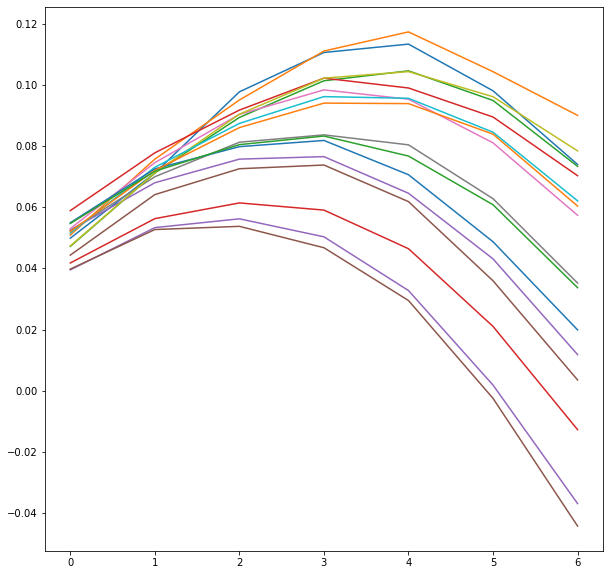

In [293]:
plt.figure(figsize=(10,10))
D_ExpB2['CP'].plot()
D_ExpB3['CP'].plot()
D_ExpB4['CP'].plot()
D_ExpB5['CP'].plot()
D_ExpB6['CP'].plot()
D_ExpB7['CP'].plot()
D_ExpB8['CP'].plot()
D_ExpB9['CP'].plot()
D_ExpB10['CP'].plot()
D_ExpB11['CP'].plot()
D_ExpB12['CP'].plot()
D_ExpB13['CP'].plot()
D_ExpB14['CP'].plot()

#D_ExpBS0['CP'].plot()
#D_ExpBS1['CP'].plot()
#D_ExpBS2['CP'].plot()
D_ExpBS3['CP'].plot()
D_ExpBS4['CP'].plot()
D_ExpBS5['CP'].plot()
#D_ExpBS6['CP'].plot()
#D_ExpBS7['CP'].plot()
#D_ExpBS8['CP'].plot()
#D_ExpBS9['CP'].plot()
#D_ExpBS10['CP'].plot()
#D_ExpBS11['CP'].plot()
#D_ExpBS12['CP'].plot()
#D_ExpBS13['CP'].plot()
#D_ExpBS14['CP'].plot()

<AxesSubplot:>

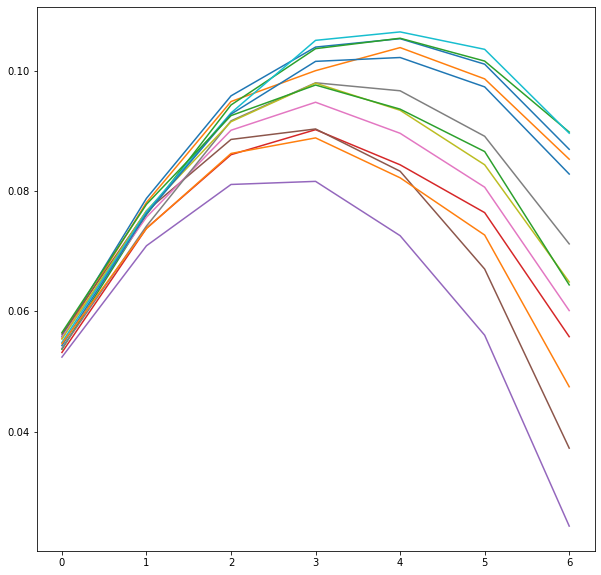

In [294]:
plt.figure(figsize=(10,10))
E2['CP'].plot()
E1['CP'].plot()
E4['CP'].plot()
E5['CP'].plot()
E6['CP'].plot()
E7['CP'].plot()
E8['CP'].plot()
E9['CP'].plot()
E10['CP'].plot()
E11['CP'].plot()
E12['CP'].plot()
E13['CP'].plot()
E14['CP'].plot()

<b>Leer el archivo con los parámetros geométricos de los rotores de entrenamiento y generar los dataframe para entrenar la red</b>

In [296]:
#Parámetros geométricos de los rotores elípticos
from sklearn.model_selection import train_test_split
XDF = pd.DataFrame(columns='Tsr e r'.split())
X = np.arange(0.2,0.9,0.1)
YP = np.concatenate((E2['CP'],E4['CP'],E5['CP'],E6['CP'],E7['CP'],E8['CP'],E9['CP'],E10['CP'],E11['CP'],E12['CP'],E13['CP'],E14['CP'],D_Exp1['CP'],D_Exp2['CP'],D_Exp3['CP'],D_Exp4['CP'],D_Exp5['CP'],D_Exp6['CP'],D_ES038['CP'],D_ES039['CP'],D_Exp8['CP'],D_Exp9['CP'],D_Exp11['CP'],D_Exp12['CP'],D_Exp13['CP'],D_Exp14['CP']))
XDF=pd.read_csv('Datos de entrenamiento Rotor elíptico.csv')

XP = XDF.values
YT = YP.reshape(-1, 1)

<b>Librerías necesarias para el entrenamiento de la red</b>

In [168]:
#Creacion de la estructura de la red neuronal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from tensorflow.keras.callbacks import EarlyStopping


<b>Función para crear el modelo</b>

In [295]:
#Función para inicializar el modelo
def crearmodelo():
    model = Sequential()
    model.add(Dense(120, activation='relu'))
    model.add(Dense(170, activation='relu'))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    Optimizador = keras.optimizers.Adam(learning_rate=0.0001,beta_1 = 0.09, beta_2 = 0.0999, epsilon=0.1 ,amsgrad = False)
    model.compile(optimizer=Optimizador,loss='mean_absolute_error')

    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25000,restore_best_weights=True)
    return model

<b> Entrenamiento y validación por el método Cross Validation </b>

In [192]:
#Algoritmo Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

kf = KFold(n_splits=26)
kf.get_n_splits(XP)
scores = np.ones(26)
Cont = 0

for train_index, test_index in kf.split(XP):
    X_train, X_test = XP[train_index], XP[test_index]
    y_train, y_test = YT[train_index], YT[test_index]
    model = crearmodelo()
    model.fit(X_train, y_train, epochs = 2500,callbacks=[early_stop],batch_size=1,validation_data=(X_test, y_test))
    test_predictions = model.predict(X_test)
    scores[Cont]=r2_score(y_test, test_predictions)
    Cont = Cont+1

Epoch 1/2500
175/175 [==============================] - 2s 4ms/step - loss: 0.0332 - val_loss: 0.0141
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0208
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.0168
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0286 - val_loss: 0.0178
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0145
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.0144
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0285 - val_loss: 0.0171
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.0161
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.0151
Epoch 10/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.020

175/175 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0018
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0015
Epoch 161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch 162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0025
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0014
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0105 - val_loss: 0.0018
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0028
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0013
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0025
Epoch 239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0011
Epoch 240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0028
Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 9.4308e-04
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 9.7537e-04
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0014
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0025
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0020
Epoch 246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 247/2500
175/175 [==============================] 

175/175 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0019
Epoch 395/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0021
Epoch 396/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0024
Epoch 397/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 398/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0036
Epoch 399/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0014
Epoch 400/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0017
Epoch 401/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 402/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0026
Epoch 403/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 8.6389e-04
Epoch 551/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 552/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0030
Epoch 553/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0021
Epoch 554/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0010
Epoch 555/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0022
Epoch 556/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 9.3763e-04
Epoch 557/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0032
Epoch 558/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 559/2500
175/175 [==============================] - 0s 2ms/step -

175/175 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 8.6275e-04
Epoch 707/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0027
Epoch 708/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0027
Epoch 709/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 9.4889e-04
Epoch 710/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0028
Epoch 711/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0015
Epoch 712/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0022
Epoch 713/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0020
Epoch 714/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 715/2500
175/175 [==============================] - 0s 2ms/step -

175/175 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0030
Epoch 863/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0016
Epoch 864/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 865/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0013
Epoch 866/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 867/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0023
Epoch 868/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 5.8019e-04
Epoch 869/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0030
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0014
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - los

175/175 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0014
Epoch 1019/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0011
Epoch 1020/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 1021/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0017
Epoch 1022/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 8.2333e-04
Epoch 1023/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 8.0254e-04
Epoch 1024/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 6.5303e-04
Epoch 1025/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0028
Epoch 1026/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 9.5939e-04
Epoch 1027/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0035
Epoch 1096/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 7.4486e-04
Epoch 1097/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0033
Epoch 1098/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0026
Epoch 1099/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0016
Epoch 1100/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0033
Epoch 1101/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 8.8122e-04
Epoch 1102/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0030
Epoch 1103/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0014
Epoch 1104/2500
175/175 [==============================] - 0s 2

175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 1250/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0019
Epoch 1251/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0025
Epoch 1252/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0017
Epoch 1253/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0032
Epoch 1254/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0045
Epoch 1255/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0019
Epoch 1256/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0018
Epoch 1257/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0010
Epoch 1258/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0020
Epoch 1404/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 1405/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0035
Epoch 1406/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0018
Epoch 1407/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0096 - val_loss: 0.0022
Epoch 1408/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 9.3493e-04
Epoch 1409/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0020
Epoch 1410/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0011
Epoch 1411/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0013
Epoch 1412/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0012
Epoch 1558/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 8.3713e-04
Epoch 1559/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0015
Epoch 1560/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0022
Epoch 1561/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0017
Epoch 1562/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0019
Epoch 1563/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 1564/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0011
Epoch 1565/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0010
Epoch 1566/2500
175/175 [==============================] - 0s 2ms/s

Epoch 1635/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0136 - val_loss: 0.0036
Epoch 1636/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 1637/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 7.2732e-04
Epoch 1638/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0018
Epoch 1639/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0015
Epoch 1640/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 1641/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0023
Epoch 1642/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 6.3260e-04
Epoch 1643/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 9.2983e-04
Epoch 1644/2500
175/175 [==================

Epoch 1790/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 1791/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0025
Epoch 1792/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0014
Epoch 1793/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0022
Epoch 1794/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0018
Epoch 1795/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0015
Epoch 1796/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0013
Epoch 1797/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0012
Epoch 1798/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 7.5935e-04
Epoch 1799/2500
175/175 [==========================

Epoch 1945/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0050
Epoch 1946/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 7.6051e-04
Epoch 1947/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0012
Epoch 1948/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 9.7835e-04
Epoch 1949/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 8.2452e-04
Epoch 1950/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0045
Epoch 1951/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0110 - val_loss: 0.0032
Epoch 1952/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0020
Epoch 1953/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0018
Epoch 1954/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0021
Epoch 2100/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0020
Epoch 2101/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0104 - val_loss: 0.0020
Epoch 2102/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 2103/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0019
Epoch 2104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0010
Epoch 2105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0012
Epoch 2106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 7.9473e-04
Epoch 2107/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0038
Epoch 2108/2500
175/175 [==============================] - 0s 2ms/s

Epoch 2177/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0018
Epoch 2178/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 2179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 8.9235e-04
Epoch 2180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0016
Epoch 2181/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss: 0.0015
Epoch 2182/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0022
Epoch 2183/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 2184/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0014
Epoch 2185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0029
Epoch 2186/2500
175/175 [==========================

Epoch 2332/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.0030
Epoch 2333/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0031
Epoch 2334/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 8.2588e-04
Epoch 2335/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0027
Epoch 2336/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0027
Epoch 2337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0013
Epoch 2338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0019
Epoch 2339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 2340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0012
Epoch 2341/2500
175/175 [==========================

Epoch 2487/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 2488/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0033
Epoch 2489/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0012
Epoch 2490/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0022
Epoch 2491/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0026
Epoch 2492/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 2493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0011
Epoch 2494/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 8.8718e-04
Epoch 2495/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0013
Epoch 2496/2500
175/175 [==========================

In [164]:
#Resultados de la evaluación
scores

array([  0.99587886,   0.93015688,  -3.00241189,   0.46894185,
       -20.15652144,   0.87279795,   0.36193744, -15.24531195,
         0.97829217,   0.97368143,   0.81341381,  -5.3755536 ,
       -11.81596848,   0.94573028,   0.65253564,   0.97456323,
         0.73318867,   0.98266377,   0.96820138,   0.97844691,
        -0.40926067,   0.87724334,   0.91032468,   0.27775611,
         0.75080882,   0.95630551])

<b> Entrenamiento del modelo final con el set completo de entrenamiento </b>

In [297]:
#Entrenamiento del modelo final con todos los rotores
model = crearmodelo()
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=1500,restore_best_weights=True)
model.fit(XP, YT, epochs = 15000,callbacks=[early_stop],batch_size=1)

Epoch 1/15000
182/182 [==============================] - 1s 1ms/step - loss: 0.0600
Epoch 2/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 3/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0244
Epoch 4/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 5/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 6/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 7/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 8/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0191
Epoch 9/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 10/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0187A: 0s - loss: 0.
Epoch 11/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 12/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 193/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 194/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 195/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 196/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 197/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 198/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 199/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 200/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 201/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 202/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0143
Epoch 203/15000
182/182 [==============================] - 0s 1ms/step

182/182 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 382/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 383/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 384/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 385/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 386/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 387/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 388/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 389/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 390/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 391/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0115
Epoch 392/15000
182/182 [==============================] - 0s 1ms/step

Epoch 476/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 477/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 478/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 479/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 480/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 481/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0057A: 0s - loss: 0.
Epoch 482/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 483/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 484/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 485/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 486/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 487/15000
182/182 [=============

182/182 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 666/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 667/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 668/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 669/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0176
Epoch 670/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 671/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 672/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 673/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 674/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 675/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 676/15000
182/182 [==============================] - 0s 1ms/step

Epoch 855/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 856/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 857/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 858/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 859/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 860/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 861/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 862/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 863/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 864/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 865/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 866/15000
182/182 [=============================

182/182 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 951/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 952/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 953/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 954/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 955/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 956/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 957/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 958/15000
182/182 [==============================] - ETA: 0s - loss: 0.009 - 0s 2ms/step - loss: 0.0094
Epoch 959/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0106A: 0s - loss: 0.0
Epoch 960/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 961/15000
182/182 [====

182/182 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 1139/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 1140/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1141/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 1142/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1143/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1144/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 1145/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 1146/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 1147/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1148/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1149/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 1327/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 1328/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 1329/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 1330/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 1331/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 1332/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 1333/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1334/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 1335/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1336/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1337/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 1421/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 1422/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1423/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 1424/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1425/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0158
Epoch 1426/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 1427/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 1428/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1429/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 1430/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 1431/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 1515/15000
182/182 [==============================] - ETA: 0s - loss: 0.011 - 0s 2ms/step - loss: 0.0118
Epoch 1516/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 1517/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 1518/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 1519/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 1520/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 1521/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 1522/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 1523/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 1524/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 1525/15000
182/182 [==========

182/182 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 1609/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 1610/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 1611/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 1612/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1613/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 1614/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 1615/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1616/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 1617/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 1618/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 1619/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 1703/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0139
Epoch 1704/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 1705/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 1706/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 1707/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 1708/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1709/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 1710/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 1711/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 1712/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 1713/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 1797/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 1798/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 1799/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 1800/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1801/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 1802/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 1803/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 1804/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1805/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 1806/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 1807/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 1891/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 1892/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 1893/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 1894/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 1895/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 1896/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 1897/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 1898/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 1899/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 1900/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 1901/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 2077/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 2078/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2079/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 2080/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 2081/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 2082/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 2083/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 2084/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 2085/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 2086/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 2087/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 2171/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 2172/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 2173/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2174/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 2175/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 2176/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 2177/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0097 ETA: 0s - loss: 0.0
Epoch 2178/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 2179/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 2180/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 2181/15000
182/182 [==============

182/182 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 2358/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 2359/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 2360/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2361/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 2362/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2363/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 2364/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 2365/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 2366/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 2367/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 2368/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 2544/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 2545/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 2546/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 2547/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 2548/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 2549/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 2550/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 2551/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 2552/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2553/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 2554/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 2731/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 2732/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 2733/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 2734/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 2735/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 2736/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 2737/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 2738/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 2739/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 2740/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 2741/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 2919/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 2920/15000
182/182 [==============================] - ETA: 0s - loss: 0.009 - 0s 2ms/step - loss: 0.0097
Epoch 2921/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 2922/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 2923/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 2924/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 2925/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 2926/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 2927/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 2928/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 2929/15000
182/182 [==========

182/182 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 3105/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3106/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 3107/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0109A: 0s - loss: 0
Epoch 3108/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 3109/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3110/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 3111/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3112/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 3113/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 3114/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 3115/15000
182/182 [===================

Epoch 3291/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 3292/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 3293/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 3294/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 3295/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 3296/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 3297/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 3298/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 3299/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 3300/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3301/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 3302/15000
182/182 [=================

182/182 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 3479/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 3480/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 3481/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 3482/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 3483/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 3484/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 3485/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 3486/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0075- ETA: 0s - loss: 0.007
Epoch 3487/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 3488/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 3489/15000
182/182 [===========

182/182 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 3665/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 3666/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3667/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 3668/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 3669/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 3670/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 3671/15000
182/182 [==============================] - ETA: 0s - loss: 0.007 - 0s 2ms/step - loss: 0.0075
Epoch 3672/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 3673/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 3674/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 3675/15000
182/182 [==========

182/182 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 3759/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 3760/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 3761/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 3762/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 3763/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 3764/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 3765/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 3766/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 3767/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 3768/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 3769/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 3945/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 3946/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 3947/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 3948/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 3949/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 3950/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 3951/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 3952/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 3953/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 3954/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 3955/15000
182/182 [==============================] - 

Epoch 4131/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 4132/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 4133/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4134/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 4135/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 4136/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 4137/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4138/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 4139/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 4140/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4141/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 4142/15000
182/182 [=================

182/182 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4318/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4319/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 4320/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4321/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4322/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4323/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4324/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 4325/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 4326/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4327/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4328/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 4505/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4506/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4507/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 4508/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 4509/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4510/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4511/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4512/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4513/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 4514/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 4515/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4599/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4600/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4601/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4602/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4603/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 4604/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 4605/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 4606/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4607/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4608/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 4609/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 4693/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 4694/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4695/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4696/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 4697/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4698/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 4699/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 4700/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 4701/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4702/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 4703/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 4879/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4880/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4881/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 4882/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4883/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 4884/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 4885/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019A: 0s - loss: 0.0
Epoch 4886/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4887/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 4888/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 4889/15000
182/182 [=================

182/182 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 5065/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5066/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5067/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5068/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 5069/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 5070/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5071/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5072/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5073/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5074/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5075/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5251/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5252/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5253/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5254/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5255/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5256/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5257/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5258/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0017A: 0s - loss: 0.
Epoch 5259/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5260/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 5261/15000
182/182 [==================

182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5437/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5438/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5439/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5440/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 5441/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5442/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5443/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5444/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5445/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 5446/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5447/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5531/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5532/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5533/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5534/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 5535/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5536/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5537/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5538/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5539/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5540/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5541/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5717/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5718/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5719/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5720/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5721/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5722/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5723/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5724/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5725/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5726/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5727/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5904/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5905/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5906/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5907/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5908/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 5909/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5910/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 5911/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5912/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 5913/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5914/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5998/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 5999/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 6000/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6001/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6002/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6003/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 6004/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 6005/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6006/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6007/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 6008/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6185/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6186/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6187/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 6188/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6189/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 6190/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6191/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6192/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6193/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 6194/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6195/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6372/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6373/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6374/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6375/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 6376/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6377/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6378/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6379/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 6380/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6381/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 6382/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6559/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6560/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6561/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6562/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6563/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6564/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6565/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6566/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6567/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015- ETA: 0s - loss: 0.001
Epoch 6568/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6569/15000
182/182 [===========

182/182 [==============================] - 0s 2ms/step - loss: 0.0014 ETA: 0s - loss: 0.
Epoch 6745/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6746/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6747/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6748/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6749/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 6750/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6751/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6752/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6753/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6754/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6755/15000
182/182 [===============

182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6932/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6933/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6934/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6935/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6936/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 6937/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6938/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6939/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 6940/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 6941/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6942/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7026/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7027/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7028/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7029/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7030/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7031/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7032/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7033/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7034/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7035/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 7036/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7213/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7214/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7215/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7216/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7217/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7218/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7219/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7220/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7221/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7222/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7223/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7307/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7308/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7309/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7310/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7311/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7312/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7313/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7314/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7315/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7316/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7317/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7493/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7494/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7495/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7496/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7497/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7498/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7499/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7500/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7501/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7502/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7503/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7587/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7588/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7589/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7590/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7591/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7592/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7593/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7594/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7595/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7596/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7597/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7774/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7775/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7776/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7777/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 7778/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7779/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7780/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7781/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7782/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7783/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7784/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7962/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 7963/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7964/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 7965/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7966/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 7967/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7968/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 7969/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 7970/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7971/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 7972/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 8056/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8057/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8058/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8059/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8060/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012 ETA: 0s - loss: 0.0
Epoch 8061/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8062/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8063/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8064/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8065/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8066/15000
182/182 [==============

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8150/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8151/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8152/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8153/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8154/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8155/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8156/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8157/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8158/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8159/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8160/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8336/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8337/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8338/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8339/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8340/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8341/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8342/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8343/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8344/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8345/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8346/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8524/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8525/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 8526/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8527/15000
182/182 [==============================] - ETA: 0s - loss: 0.001 - 0s 1ms/step - loss: 0.0012
Epoch 8528/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 8529/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8530/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8531/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8532/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8533/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8534/15000
182/182 [==========

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8711/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8712/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8713/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8714/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8715/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 8716/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8717/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8718/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8719/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8720/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8721/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8805/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8806/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8807/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8808/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8809/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8810/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8811/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8812/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8813/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8814/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8815/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 8993/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8994/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8995/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8996/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8997/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8998/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8999/15000
182/182 [==============================] - ETA: 0s - loss: 0.0012 - 0s 1ms/step - loss: 0.0012
Epoch 9000/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9001/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9002/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9003/15000
182/182 [=========

182/182 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 9087/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9088/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9089/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9090/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 9091/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9092/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9093/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9094/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9095/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9096/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9097/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9273/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9274/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9275/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9276/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9277/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 9278/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9279/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9280/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9281/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9282/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9283/15000
182/182 [==============================] - 

182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9367/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9368/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9369/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9370/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9371/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 9372/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.8014e-04
Epoch 9373/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9374/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9375/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 9376/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7905e-04
Epoch 9377/15000
182/182 [==========================

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9554/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9555/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9556/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9557/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9558/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.6775e-04
Epoch 9559/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.7303e-04
Epoch 9560/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9561/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 9562/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9563/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9564/15000
182/182 [==========================

Epoch 9740/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9741/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9742/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9743/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9744/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9745/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9746/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9747/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.8445e-04
Epoch 9748/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9749/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9750/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9751/15000
182/182 [=============

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9927/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9928/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9929/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9930/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9931/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.5938e-04
Epoch 9932/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9933/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9732e-04
Epoch 9934/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9935/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 9936/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 9937/15000
182/182 [==========================

182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10112/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.3474e-04
Epoch 10113/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.6373e-04
Epoch 10114/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10115/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10116/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10117/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9444e-04
Epoch 10118/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10119/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10120/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10121/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10122/15000
182/182 [===========

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10296/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.4826e-04
Epoch 10297/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10298/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10299/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.8872e-04
Epoch 10300/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10301/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 10302/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10303/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10304/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10305/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10306/15000
182/182 [===============

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10480/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.6102e-04
Epoch 10481/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10482/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10483/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.8272e-04
Epoch 10484/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10485/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10486/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10487/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10488/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.7949e-04
Epoch 10489/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10490/15000
182/182 [===========

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10571/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.2392e-04
Epoch 10572/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10573/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10574/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10575/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10576/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.5133e-04
Epoch 10577/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10578/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10579/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10580/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10581/15000
182/182 [===============

182/182 [==============================] - 0s 1ms/step - loss: 9.5093e-04
Epoch 10753/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10754/15000
182/182 [==============================] - ETA: 0s - loss: 9.9999e-0 - 0s 1ms/step - loss: 0.0010
Epoch 10755/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9974e-04
Epoch 10756/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10757/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.7741e-04
Epoch 10758/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.9300e-04
Epoch 10759/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10760/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 10761/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10762/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10935/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9072e-04
Epoch 10936/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10937/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10938/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10939/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9809e-04
Epoch 10940/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10941/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10942/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10943/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10944/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 10945/15000
182/182 [===============

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11117/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11118/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.4807e-04
Epoch 11119/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11120/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11121/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11122/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11123/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11124/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.2466e-04
Epoch 11125/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11126/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11127/15000
182/182 [===============

182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11299/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11300/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11301/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 11302/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9137e-04
Epoch 11303/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11304/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.7168e-04
Epoch 11305/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11306/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11307/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11308/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.3904e-04
Epoch 11309/15000
182/182 [===========

182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11481/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2233e-04
Epoch 11482/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11483/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2552e-04
Epoch 11484/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11485/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8328e-04
Epoch 11486/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11487/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11488/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.5753e-04
Epoch 11489/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11490/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7065e-04
Epoch 11491/15000
182/182 [===

182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11661/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9177e-04
Epoch 11662/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11663/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7650e-04
Epoch 11664/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11665/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11666/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11667/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1794e-04
Epoch 11668/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11669/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.4437e-04
Epoch 11670/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0388e-04
Epoch 11671/15000
182/182 [===

182/182 [==============================] - 0s 2ms/step - loss: 9.6464e-04
Epoch 11839/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3711e-04
Epoch 11840/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.5418e-04
Epoch 11841/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 11842/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 11843/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.9373e-04
Epoch 11844/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.8759e-04
Epoch 11845/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11846/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.6575e-04
Epoch 11847/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8857e-04
Epoch 11848/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.7524e-04
Epoch 11849/15000


182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12018/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 12019/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.9397e-04
Epoch 12020/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 12021/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.4826e-04
Epoch 12022/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12023/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4748e-04
Epoch 12024/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7456e-04
Epoch 12025/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12026/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2080e-04
Epoch 12027/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3467e-04
Epoch 12028/15000
182/182 

182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12107/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12108/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2701e-04
Epoch 12109/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 12110/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 12111/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.9755e-04
Epoch 12112/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0295e-04
Epoch 12113/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.7261e-04
Epoch 12114/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.9270e-04
Epoch 12115/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.5638e-04
Epoch 12116/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9335e-04
Epoch 12117/15000
182/

182/182 [==============================] - 0s 2ms/step - loss: 9.2528e-04
Epoch 12284/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.9624e-04
Epoch 12285/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7582e-04
Epoch 12286/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.5015e-04
Epoch 12287/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4097e-04
Epoch 12288/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 12289/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 12290/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2086e-04
Epoch 12291/15000
182/182 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 12292/15000
182/182 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0011
Epoch 12293/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.5317e-0

182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12462/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.8584e-04
Epoch 12463/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.2408e-04
Epoch 12464/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.1138e-04
Epoch 12465/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12466/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1043e-04
Epoch 12467/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2334e-04
Epoch 12468/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12469/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.8337e-04
Epoch 12470/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8345e-04s - loss: 9.7360
Epoch 12471/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7784e-04
Ep

182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12640/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2765e-04
Epoch 12641/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.4099e-04
Epoch 12642/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12643/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3351e-04
Epoch 12644/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1131e-04
Epoch 12645/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.4968e-04
Epoch 12646/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7716e-04
Epoch 12647/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.6320e-04
Epoch 12648/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3321e-04
Epoch 12649/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.5929e-04
Epoch 12650/15

182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12818/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 12819/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.8031e-04
Epoch 12820/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2084e-04
Epoch 12821/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.5236e-04
Epoch 12822/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9805e-04
Epoch 12823/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6594e-04
Epoch 12824/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2070e-04
Epoch 12825/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.9976e-04
Epoch 12826/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.6453e-04
Epoch 12827/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2056e-04
Epoch 12828/15

182/182 [==============================] - 0s 1ms/step - loss: 8.8949e-04
Epoch 12996/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.4746e-04
Epoch 12997/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9948e-04
Epoch 12998/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3066e-04
Epoch 12999/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1807e-04
Epoch 13000/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2342e-04
Epoch 13001/15000
182/182 [==============================] - ETA: 0s - loss: 8.4592e-0 - 0s 2ms/step - loss: 8.4692e-04
Epoch 13002/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7625e-04
Epoch 13003/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9343e-04
Epoch 13004/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8843e-04
Epoch 13005/15000
182/182 [==============================] - 0s 2ms/st

182/182 [==============================] - 0s 2ms/step - loss: 9.3880e-04
Epoch 13172/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.4904e-04
Epoch 13173/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8522e-04
Epoch 13174/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.6582e-04A: 0s - loss: 8.1905e
Epoch 13175/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.8955e-04
Epoch 13176/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.5914e-04
Epoch 13177/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3529e-04
Epoch 13178/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3123e-04
Epoch 13179/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0765e-04
Epoch 13180/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.5763e-04
Epoch 13181/15000
182/182 [==============================] - 0s 2ms/step - lo

182/182 [==============================] - 0s 2ms/step - loss: 8.6740e-04
Epoch 13349/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1708e-04
Epoch 13350/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6256e-04
Epoch 13351/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13352/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6510e-04
Epoch 13353/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8278e-04
Epoch 13354/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8224e-04
Epoch 13355/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6196e-04
Epoch 13356/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0711e-04
Epoch 13357/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2194e-04
Epoch 13358/15000
182/182 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - los

182/182 [==============================] - 0s 2ms/step - loss: 8.5782e-04
Epoch 13525/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8018e-04A: 0s - loss: 8.6370e
Epoch 13526/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.4092e-04
Epoch 13527/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7305e-04
Epoch 13528/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.4555e-04
Epoch 13529/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.6482e-04A: 0s - loss: 8.2112e
Epoch 13530/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.6212e-04
Epoch 13531/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0374e-04
Epoch 13532/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.7716e-04
Epoch 13533/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9815e-04
Epoch 13534/15000
182/182 [=============================

Epoch 13701/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3081e-04
Epoch 13702/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4908e-04
Epoch 13703/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3781e-04
Epoch 13704/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2696e-04
Epoch 13705/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5165e-04
Epoch 13706/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.2737e-04
Epoch 13707/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6815e-04
Epoch 13708/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.3212e-04
Epoch 13709/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1267e-04
Epoch 13710/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.1140e-04
Epoch 13711/15000
182/182 [==============================] - 0s 2ms/step - loss:

182/182 [==============================] - 0s 2ms/step - loss: 8.5793e-04
Epoch 13878/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.5827e-04
Epoch 13879/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8800e-04
Epoch 13880/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.0287e-04
Epoch 13881/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.0618e-04
Epoch 13882/15000
182/182 [==============================] - 0s 1ms/step - loss: 9.3144e-04
Epoch 13883/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.8522e-04
Epoch 13884/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5367e-04
Epoch 13885/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6879e-04
Epoch 13886/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9789e-04
Epoch 13887/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.9159e-04
Epoch 

182/182 [==============================] - 0s 2ms/step - loss: 8.2151e-04
Epoch 14055/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2287e-04
Epoch 14056/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5284e-04
Epoch 14057/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9290e-04
Epoch 14058/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.4219e-04
Epoch 14059/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 14060/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2809e-04
Epoch 14061/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6775e-04
Epoch 14062/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3840e-04
Epoch 14063/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.6022e-04
Epoch 14064/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8325e-04
Epoch 1406

182/182 [==============================] - 0s 2ms/step - loss: 8.7560e-04
Epoch 14231/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.4072e-04
Epoch 14232/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0068e-04
Epoch 14233/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9428e-04
Epoch 14234/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4614e-04
Epoch 14235/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4649e-04
Epoch 14236/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6582e-04
Epoch 14237/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8517e-04
Epoch 14238/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.5174e-04
Epoch 14239/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 14240/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6361e-04
Epoch 1424

182/182 [==============================] - 0s 2ms/step - loss: 8.3700e-04
Epoch 14320/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7681e-04
Epoch 14321/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8871e-04
Epoch 14322/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2514e-04
Epoch 14323/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.3652e-04
Epoch 14324/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.0240e-04
Epoch 14325/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5853e-04
Epoch 14326/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8362e-04
Epoch 14327/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7684e-04
Epoch 14328/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.7848e-04
Epoch 14329/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.7494e-04
Epoch 

182/182 [==============================] - 0s 2ms/step - loss: 8.7207e-04
Epoch 14409/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.5644e-04
Epoch 14410/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.7376e-04
Epoch 14411/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.4557e-04
Epoch 14412/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.6123e-04
Epoch 14413/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.8525e-04
Epoch 14414/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.9920e-04
Epoch 14415/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.0869e-04
Epoch 14416/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.4119e-04
Epoch 14417/15000
182/182 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 14418/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5633e-04
Epoch 1441

182/182 [==============================] - 0s 2ms/step - loss: 9.3705e-04
Epoch 14498/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5254e-04
Epoch 14499/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.1382e-04
Epoch 14500/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.7804e-04
Epoch 14501/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.2017e-04
Epoch 14502/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1051e-04
Epoch 14503/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.0170e-04
Epoch 14504/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5656e-04
Epoch 14505/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.6725e-04
Epoch 14506/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.8328e-04
Epoch 14507/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.4017e-04
Epoch 

182/182 [==============================] - 0s 2ms/step - loss: 8.9427e-04A: 0s - loss: 9.4045
Epoch 14675/15000
182/182 [==============================] - 0s 2ms/step - loss: 6.8346e-04
Epoch 14676/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9430e-04
Epoch 14677/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.1516e-04
Epoch 14678/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.8975e-04
Epoch 14679/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.0133e-04
Epoch 14680/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3806e-04
Epoch 14681/15000
182/182 [==============================] - 0s 2ms/step - loss: 7.2442e-04
Epoch 14682/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.0118e-04
Epoch 14683/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9286e-04
Epoch 14684/15000
182/182 [==============================] - 0s 2ms/step - los

182/182 [==============================] - 0s 2ms/step - loss: 8.0288e-04
Epoch 14851/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.8937e-04
Epoch 14852/15000
182/182 [==============================] - 0s 2ms/step - loss: 9.1904e-04
Epoch 14853/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.0559e-04
Epoch 14854/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5448e-04
Epoch 14855/15000
182/182 [==============================] - 0s 1ms/step - loss: 8.9437e-04
Epoch 14856/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.6145e-04
Epoch 14857/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.3726e-04
Epoch 14858/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.9679e-04
Epoch 14859/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.5077e-04
Epoch 14860/15000
182/182 [==============================] - 0s 2ms/step - loss: 8.2454e-04
Epoch 

<b>Respaldar el modelo en un archivo h5</b>

In [ ]:
#Guardar el modelo en un archivo h5
model.save('Modelo_No_Inercial_CV_Final.h5')

<b> Cargar y preprocesar los Datos de las simulaciones de prueba </b>

In [4]:
#Cargar información de los archivos de prueba
EP1 = pd.read_csv('E11S.csv',skiprows=4)
EP2 = pd.read_csv('E2S.csv',skiprows=4)
EP3 = pd.read_csv('E3S.csv',skiprows=4)

In [5]:
#Cálculo del CP para los rotores de prueba
inicio = 0.2
final = 0.8
paso = 0.1
V = 6
V1 = 3
n_m = 150
n_c = 3
R_r = 0.25
lista = 'TSR=0.2, Torque_1_2 (N*m)+TSR=0.3, Torque_1_2 (N*m)+TSR=0.4, Torque_1_2 (N*m)+TSR=0.5, Torque_1_2 (N*m)+TSR=0.6, Torque_1_2 (N*m)+TSR=0.7, Torque_1_2 (N*m)+TSR=0.8, Torque_1_2 (N*m)'


D1=Calc_CP(EP1,inicio,paso,final,V,R_r,n_m,n_c,lista)
D2=Calc_CP(EP2,inicio,paso,final,V,R_r,n_m,n_c,lista)
D3=Calc_CP(EP3,inicio,paso,final,V,R_r,n_m,n_c,lista)

D_P1 = pd.DataFrame(columns='TSR CP'.split())
D_P2 = pd.DataFrame(columns='TSR CP'.split())
D_P3 = pd.DataFrame(columns='TSR CP'.split())

D_P1['TSR'] = np.arange(0.2,0.9,0.1)
D_P2['TSR'] = np.arange(0.2,0.9,0.1)
D_P3['TSR'] = np.arange(0.2,0.9,0.1)

D_P1['CP'] = D1
D_P2['CP'] = D2
D_P3['CP'] = D3

In [6]:
#Guardar la información del CP para los rotores de prueba
D_P1.to_csv('CPP1.csv')
D_P2.to_csv('CPP2.csv')
D_P3.to_csv('CPP3.csv')

In [309]:
#Parámetros geométricos de los rotores de prueba
from sklearn.model_selection import train_test_split
XDF = pd.DataFrame(columns='Tsr e r'.split())
X = np.arange(0.2,0.9,0.1)
YP = np.concatenate((D_P1['CP'],D_P2['CP'],D_P3['CP']))
XDF=pd.read_csv('Datos de prueba Rotor elíptico.csv')

X_test = XDF.values
Y_test = YP.reshape(-1, 1)

<b> Gráficas de evaluación de los tres rotores de prueba</b>

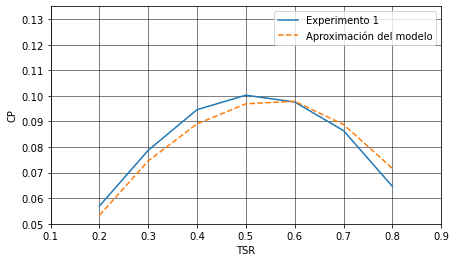

In [348]:
test_predictions = model.predict(X_test[0:7])
scoreP1=r2_score(Y_test[0:7], test_predictions)
pred_df = pd.DataFrame(Y_test[0:7],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[0:7].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'])
line.set_label('Experimento 1')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.1, 0.9])
ax.set_ylim([0.05, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

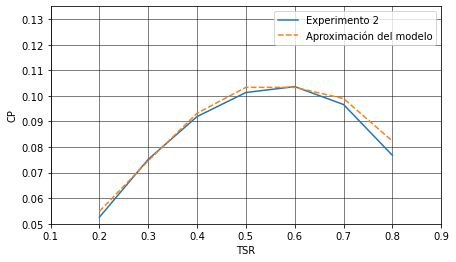

In [347]:
test_predictions = model.predict(X_test[7:14])
scoreP2=r2_score(Y_test[7:14], test_predictions)
pred_df = pd.DataFrame(Y_test[7:14],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[7:14].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'])
line.set_label('Experimento 2')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.1, 0.9])
ax.set_ylim([0.05, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

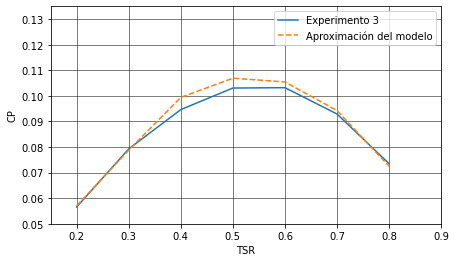

In [345]:
test_predictions = model.predict(X_test[14:21])
scoreP3=r2_score(Y_test[14:21], test_predictions)
pred_df = pd.DataFrame(Y_test[14:21],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[14:21].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'].values)
line.set_label('Experimento 3')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.15, 0.9])
ax.set_ylim([0.05, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

<b> Resultados de las evaluaciones </b>

In [340]:
scoreP1

0.9246789029920395

In [263]:
scoreP2

0.9762457478487915

In [264]:
scoreP3

0.9742695529994059

In [23]:
from sklearn.metrics import r2_score
test_predictions = model.predict(X_test)
scoreT=r2_score(Y_test, test_predictions)
scoreT

0.9600128238471362

<b> Mismo proceso para el rotor Batch </b>

In [314]:
#Parámetros geométricos de los rotores
from sklearn.model_selection import train_test_split
XDF = pd.DataFrame(columns='Tsr a e'.split())
X = np.arange(0.2,0.9,0.1)
YP = np.concatenate((D_ExpB2['CP'],D_ExpB3['CP'],D_ExpB4['CP'],D_ExpB5['CP'],D_ExpB6['CP'],D_ExpB7['CP'],D_ExpB8['CP'],D_ExpB9['CP'],D_ExpB10['CP'],D_ExpB11['CP'],D_ExpB12['CP'],D_ExpB13['CP'],D_ExpB14['CP'],D_ExpBS2['CP'],D_ExpBS3['CP'],D_ExpBS4['CP'],D_ExpBS5['CP'],D_ExpBS6['CP'],D_ExpBS7['CP'],D_ExpBS8['CP'],D_ExpBS9['CP'],D_ExpBS10['CP'],D_ExpBS11['CP'],D_ExpBS12['CP'],D_ExpBS13['CP'],D_ExpBS14['CP']))
XDF = pd.read_csv('Datos de Extrenamiento Rotor Batch.csv')

XP = XDF.values
YT = YP.reshape(-1, 1)

<b> Función para crear el modelo </b>

In [ ]:
#Función para inicializar el modelo Batch
def crearmodelo():
    model = Sequential()
    model.add(Dense(180, activation='relu'))
    model.add(Dense(190, activation='relu'))
    model.add(Dense(180, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='linear'))
    Optimizador = keras.optimizers.Adam(learning_rate=0.0001,beta_1 = 0.09, beta_2 = 0.0999, epsilon=0.1 ,amsgrad = False)
    model.compile(optimizer=Optimizador,loss='mean_absolute_error')

    from tensorflow.keras.callbacks import EarlyStopping

    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000,restore_best_weights=True)
    return model

<b> Entrenamiento y validación por el método Cross Validation </b>

In [199]:
#Algoritmo Cross Validation
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from tensorflow.keras.callbacks import EarlyStopping
tf.keras.backend.clear_session()
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000, restore_best_weights=True)
kf = KFold(n_splits=26)
kf.get_n_splits(XP)
scores = np.ones(26)
Cont = 0
for train_index, test_index in kf.split(XP):
    X_train, X_test = XP[train_index], XP[test_index]
    y_train, y_test = YT[train_index], YT[test_index]
    model = crearmodelo()
    model.fit(X_train, y_train, epochs = 2500,callbacks=[early_stop],batch_size=1,validation_data=(X_test, y_test))
    test_predictions = model.predict(X_test)
    scores[Cont]=r2_score(y_test, test_predictions)
    Cont = Cont+1

Epoch 1/2500
175/175 [==============================] - 1s 2ms/step - loss: 0.0357 - val_loss: 0.0255
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0211
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0193 - val_loss: 0.0206
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0201
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0205
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0202
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0193
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0202
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0194
Epoch 10/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.015

175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 159/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0048
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0070
Epoch 162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 237/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 246/2500
175/175 [==============================] - 0s 2ms

Epoch 316/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 317/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 318/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 319/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0039
Epoch 320/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 321/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 322/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 323/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 324/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 325/2500
175/175 [==============================] - 0s 1ms

Epoch 473/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0033
Epoch 474/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 475/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 476/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 477/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 478/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0055
Epoch 479/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 480/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 481/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 482/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - ETA: 0s - loss: 0.0013 - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 630/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 631/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 632/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 633/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 634/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 635/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 636/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 637/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 638/2500
175/175 [==============================

Epoch 786/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 787/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 788/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 789/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 790/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 791/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 792/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 793/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 794/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 795/2500
175/175 [==============================] - 0s 2ms

Epoch 865/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 866/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 867/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 868/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 869/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 872/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 873/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 874/2500
175/175 [==============================] - 0s 2ms

Epoch 944/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 945/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 946/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 947/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 948/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 949/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 950/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 951/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 952/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 953/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 1101/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1102/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1103/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 1105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 1106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 1107/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9918e-04 - val_loss: 0.0031
Epoch 1108/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 1109/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 1180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1181/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1182/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 1183/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 1184/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 1185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 1186/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 1187/2500
175/175 [==============================] - 0s 1ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1257/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 1258/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 1259/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1260/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1261/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 1262/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1263/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1264/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1265/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 1335/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 1336/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 1337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 1339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 1340/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 1341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 1342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 1343/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0093
Epoch 122/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0095
Epoch 123/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0106
Epoch 124/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0097
Epoch 125/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0083
Epoch 126/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0087
Epoch 127/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0071
Epoch 128/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0090
Epoch 129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 130/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 200/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0075
Epoch 201/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 202/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0080
Epoch 203/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0054
Epoch 204/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 205/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 206/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 207/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0057
Epoch 208/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0062
Epoch 209/2500
175/175 [==============================] - 0s 2ms

Epoch 279/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 280/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 281/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 282/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 283/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 284/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 285/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0065
Epoch 286/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 287/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0054
Epoch 288/2500
175/175 [==============================] - 0s 2ms

Epoch 436/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 437/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 438/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 439/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 440/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 441/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 442/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 443/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 444/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0033
Epoch 445/2500
175/175 [==============================] - 0s 2ms

Epoch 515/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0040
Epoch 516/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 517/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 518/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0049
Epoch 519/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 520/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 521/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 522/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 523/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 524/2500
175/175 [==============================] - 0s 1ms

Epoch 594/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 595/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 596/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 597/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0067
Epoch 598/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 599/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 600/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 601/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 602/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 603/2500
175/175 [==============================] - 0s 2ms

Epoch 673/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 674/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 675/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 676/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 677/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 678/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 679/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 680/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 681/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 682/2500
175/175 [==============================] - 0s 2ms

Epoch 830/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 831/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 832/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 833/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 834/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 835/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 836/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 837/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 838/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 839/2500
175/175 [==============================] - 0s 2ms

Epoch 987/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 988/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 989/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 990/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 991/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 992/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 993/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 994/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 995/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 996/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 1066/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 1067/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 1068/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 1069/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 1070/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 1071/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1072/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 1073/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 1074/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 1222/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1223/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 1224/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 1225/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1226/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 1227/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 1228/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 1229/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 1230/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 1378/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 1379/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1380/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 1381/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 1382/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 1383/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1384/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 1385/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 1386/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1534/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1535/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 1536/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 1537/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 1538/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 1539/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1540/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1541/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 1542/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0439
Epoch 123/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0430
Epoch 124/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0518
Epoch 125/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0432
Epoch 126/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0500
Epoch 127/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0047 - val_loss: 0.0471
Epoch 128/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0412
Epoch 129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0452
Epoch 130/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0440
Epoch 131/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 201/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0455
Epoch 202/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0477
Epoch 203/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0492
Epoch 204/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0466
Epoch 205/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0465
Epoch 206/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0478
Epoch 207/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0483
Epoch 208/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0471
Epoch 209/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0471
Epoch 210/2500
175/175 [==============================] - 0s 2ms

Epoch 280/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0520
Epoch 281/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0493
Epoch 282/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0513
Epoch 283/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0510
Epoch 284/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0483
Epoch 285/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0491
Epoch 286/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0516
Epoch 287/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0510
Epoch 288/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0513
Epoch 289/2500
175/175 [==============================] - 0s 2ms

Epoch 359/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0517
Epoch 360/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0517
Epoch 361/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0518
Epoch 362/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0509
Epoch 363/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0515
Epoch 364/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0523
Epoch 365/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0535
Epoch 366/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0512
Epoch 367/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0539
Epoch 368/2500
175/175 [==============================] - 0s 2ms

Epoch 516/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0516
Epoch 517/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0529
Epoch 518/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0509
Epoch 519/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0507
Epoch 520/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0549
Epoch 521/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0507
Epoch 522/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0514
Epoch 523/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0526
Epoch 524/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0524
Epoch 525/2500
175/175 [==============================] - 0s 2ms

Epoch 595/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0544
Epoch 596/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0541
Epoch 597/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0541
Epoch 598/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0540
Epoch 599/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0527
Epoch 600/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0527
Epoch 601/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0517
Epoch 602/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0537
Epoch 603/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0532
Epoch 604/2500
175/175 [==============================] - 0s 2ms

Epoch 752/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0531
Epoch 753/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0528
Epoch 754/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0530
Epoch 755/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0542
Epoch 756/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0533
Epoch 757/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0531
Epoch 758/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0551
Epoch 759/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0527
Epoch 760/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0511
Epoch 761/2500
175/175 [==============================] - 0s 2ms

Epoch 831/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0516
Epoch 832/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0507
Epoch 833/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0528
Epoch 834/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0531
Epoch 835/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0514
Epoch 836/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0528
Epoch 837/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0518
Epoch 838/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0544
Epoch 839/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0545
Epoch 840/2500
175/175 [==============================] - 0s 2ms

Epoch 988/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0542
Epoch 989/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0520
Epoch 990/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0527
Epoch 991/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0524
Epoch 992/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0512
Epoch 993/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0531
Epoch 994/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0516
Epoch 995/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0500
Epoch 996/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0525
Epoch 997/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0133
Epoch 138/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0118
Epoch 139/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0112
Epoch 140/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0123
Epoch 141/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0109
Epoch 142/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0037 - val_loss: 0.0151
Epoch 143/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0167
Epoch 144/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0112
Epoch 145/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0110
Epoch 146/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 216/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0157
Epoch 217/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0173
Epoch 218/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0167
Epoch 219/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0150
Epoch 220/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0147
Epoch 221/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0198
Epoch 222/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0140
Epoch 223/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0149
Epoch 224/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0165
Epoch 225/2500
175/175 [==============================] - 0s 2ms

Epoch 295/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0156
Epoch 296/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0183
Epoch 297/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0155
Epoch 298/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0144
Epoch 299/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0134
Epoch 300/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0153
Epoch 301/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0150
Epoch 302/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0130
Epoch 303/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0169
Epoch 304/2500
175/175 [==============================] - 0s 2ms

Epoch 374/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0188
Epoch 375/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0179
Epoch 376/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0205
Epoch 377/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0156
Epoch 378/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0126
Epoch 379/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0181
Epoch 380/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0184
Epoch 381/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0191
Epoch 382/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0169
Epoch 383/2500
175/175 [==============================] - 0s 2ms

Epoch 453/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0163
Epoch 454/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0189
Epoch 455/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0186
Epoch 456/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0172
Epoch 457/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0173
Epoch 458/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0184
Epoch 459/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0179
Epoch 460/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0182
Epoch 461/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0178
Epoch 462/2500
175/175 [==============================] - 0s 2ms

Epoch 610/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0158
Epoch 611/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0160
Epoch 612/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0191
Epoch 613/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0184
Epoch 614/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0209
Epoch 615/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0189
Epoch 616/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0174
Epoch 617/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 618/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0173
Epoch 619/2500
175/175 [==============================] - 0s 2ms

Epoch 689/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0187
Epoch 690/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0195
Epoch 691/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0154
Epoch 692/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0191
Epoch 693/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0166
Epoch 694/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0192
Epoch 695/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0148
Epoch 696/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 697/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0177
Epoch 698/2500
175/175 [==============================] - 0s 2ms

Epoch 768/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0180
Epoch 769/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0168
Epoch 770/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0210
Epoch 771/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0175
Epoch 772/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0164
Epoch 773/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0186
Epoch 774/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0188
Epoch 775/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0183
Epoch 776/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0194
Epoch 777/2500
175/175 [==============================] - 0s 2ms

Epoch 925/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0202
Epoch 926/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0172
Epoch 927/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0190
Epoch 928/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0177
Epoch 929/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0172
Epoch 930/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0181
Epoch 931/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0178
Epoch 932/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0193
Epoch 933/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 934/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 1s 2ms/step - loss: 0.0257 - val_loss: 0.0221
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0209 - val_loss: 0.0204
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0179
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0173
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0162
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0167
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0160
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0168
Epoch 10/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss:

175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0105
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0096
Epoch 161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0080
Epoch 162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0098
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0124
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0083
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0079
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0097
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0132
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0084
Epoch 239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0074
Epoch 240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0108
Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0069
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0085
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0089
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0074
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0086
Epoch 246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0084
Epoch 247/2500
175/175 [==============================] - 0s 2ms

Epoch 395/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 396/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0072
Epoch 397/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0065
Epoch 398/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0090
Epoch 399/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 400/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0082
Epoch 401/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0082
Epoch 402/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0073
Epoch 403/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0081
Epoch 404/2500
175/175 [==============================] - 0s 2ms

Epoch 552/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 553/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 554/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 555/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 556/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 557/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071.0
Epoch 558/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 559/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0050
Epoch 560/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 561/2500
175/175 [==============================] - 0s 2

Epoch 709/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0085
Epoch 710/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 711/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0077
Epoch 712/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 713/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 714/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 715/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 716/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0069
Epoch 717/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 718/2500
175/175 [==============================] - 0s 2ms

Epoch 866/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0066
Epoch 867/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0054
Epoch 868/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 869/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0061
Epoch 872/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 873/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 874/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 875/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 1023/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 1024/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 1025/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1026/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 1027/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 1028/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 1029/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1030/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 1031/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 1179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 1180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 1181/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0050
Epoch 1182/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 1183/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1184/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 1185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 1186/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 1187/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 1335/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1336/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 1337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0069
Epoch 1338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 1339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 1341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 1342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 1343/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 1413/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 1414/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1415/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7256e-04 - val_loss: 0.0064
Epoch 1416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 1417/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1418/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1419/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 1420/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1421/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 1491/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 1492/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1494/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1495/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 1496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 1497/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1498/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 1499/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 1569/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 1570/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1571/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 1572/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1573/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 1574/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 1575/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6284e-04 - val_loss: 0.0053
Epoch 1576/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6629e-04 - val_loss: 0.0053
Epoch 1577/2500
175/175 [==============================] - 0s 2

Epoch 1646/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 1647/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 1648/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1649/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9155e-04 - val_loss: 0.0045
Epoch 1650/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9383e-04 - val_loss: 0.0061
Epoch 1651/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1652/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 1653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1654/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1655/2500
175/175 [======================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 1801/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 1802/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 1803/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0059
Epoch 1804/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1805/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 1806/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4151e-04 - val_loss: 0.0054
Epoch 1807/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 1808/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 1809/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 9.3287e-04 - val_loss: 0.0042
Epoch 1955/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0045
Epoch 1956/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8335e-04 - val_loss: 0.0050
Epoch 1957/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7393e-04 - val_loss: 0.0054
Epoch 1958/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1959/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 1960/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2792e-04 - val_loss: 0.0053
Epoch 1961/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3867e-04 - val_loss: 0.0052
Epoch 1962/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9932e-04 - val_loss: 0.0049
Epoch 1963/2500
175/175 [======================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 2107/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2021e-04 - val_loss: 0.0042
Epoch 2108/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8447e-04 - val_loss: 0.0055
Epoch 2109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0048
Epoch 2110/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 2111/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8469e-04 - val_loss: 0.0046
Epoch 2112/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1446e-04 - val_loss: 0.0052
Epoch 2113/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 2114/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8468e-04 - val_loss: 0.0056
Epoch 2115/2500
175/175 [==========================

175/175 [==============================] - 0s 2ms/step - loss: 9.5505e-04 - val_loss: 0.0053
Epoch 2183/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1732e-04 - val_loss: 0.0057
Epoch 2184/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6606e-04 - val_loss: 0.0044
Epoch 2185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 2186/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8180e-04 - val_loss: 0.0049
Epoch 2187/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7233e-04 - val_loss: 0.0037
Epoch 2188/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4434e-04 - val_loss: 0.0043
Epoch 2189/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7687e-04 - val_loss: 0.0050
Epoch 2190/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9753e-04 - val_loss: 0.0065
Epoch 2191/2500
175/175 [==============

Epoch 2258/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.5954e-04 - val_loss: 0.0043
Epoch 2259/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6213e-04 - val_loss: 0.0034
Epoch 2260/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6537e-04 - val_loss: 0.0057
Epoch 2261/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7388e-04 - val_loss: 0.0048
Epoch 2262/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0004e-04 - val_loss: 0.0050
Epoch 2263/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4118e-04 - val_loss: 0.0048
Epoch 2264/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8520e-04 - val_loss: 0.0046
Epoch 2265/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6020e-04 - val_loss: 0.0046
Epoch 2266/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6164e-04 - val_loss: 0.0049
Epoch 2267/2500
175

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 2409/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0507e-04 - val_loss: 0.0049
Epoch 2410/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0495e-04 - val_loss: 0.0046
Epoch 2411/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2856e-04 - val_loss: 0.0060
Epoch 2412/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5211e-04 - val_loss: 0.0049
Epoch 2413/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6606e-04 - val_loss: 0.0038
Epoch 2414/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3711e-04 - val_loss: 0.0051
Epoch 2415/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.2593e-04 - val_loss: 0.0048
Epoch 2416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 2417/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0197
Epoch 55/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0208
Epoch 56/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0211
Epoch 57/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0226
Epoch 58/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0236
Epoch 59/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0206
Epoch 60/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0196
Epoch 61/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0196
Epoch 62/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0182
Epoch 63/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0054 - v

175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0258
Epoch 134/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0238
Epoch 135/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0252
Epoch 136/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0247
Epoch 137/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0210
Epoch 138/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0252
Epoch 139/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0250
Epoch 140/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0268
Epoch 141/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0253
Epoch 142/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 212/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0254.0019
Epoch 213/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0273
Epoch 214/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0260
Epoch 215/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0296
Epoch 216/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0260
Epoch 217/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0261
Epoch 218/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0258
Epoch 219/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0259
Epoch 220/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0241
Epoch 221/2500
175/175 [==============================] - 0

Epoch 369/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0275
Epoch 370/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0268
Epoch 371/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0292
Epoch 372/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0270
Epoch 373/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0281
Epoch 374/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0246
Epoch 375/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0295
Epoch 376/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0235
Epoch 377/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0275
Epoch 378/2500
175/175 [==============================] - 0s 2ms

Epoch 448/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0271
Epoch 449/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0240
Epoch 450/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0257
Epoch 451/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0270
Epoch 452/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0278
Epoch 453/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0271
Epoch 454/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0268
Epoch 455/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0278
Epoch 456/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0258
Epoch 457/2500
175/175 [==============================] - 0s 2ms

Epoch 605/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0277
Epoch 606/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0253
Epoch 607/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0253
Epoch 608/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0248
Epoch 609/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0271
Epoch 610/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0244
Epoch 611/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0259
Epoch 612/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0252
Epoch 613/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0271
Epoch 614/2500
175/175 [==============================] - 0s 2ms

Epoch 684/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0272
Epoch 685/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0261
Epoch 686/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0242
Epoch 687/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0263
Epoch 688/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0266
Epoch 689/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0249
Epoch 690/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0271
Epoch 691/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0281
Epoch 692/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0279
Epoch 693/2500
175/175 [==============================] - 0s 2ms

Epoch 763/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0242
Epoch 764/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0237
Epoch 765/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0263
Epoch 766/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0270
Epoch 767/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0266
Epoch 768/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0256
Epoch 769/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0263
Epoch 770/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0248
Epoch 771/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0254
Epoch 772/2500
175/175 [==============================] - 0s 2ms

Epoch 920/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0281
Epoch 921/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0251
Epoch 922/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7969e-04 - val_loss: 0.0263
Epoch 923/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0257
Epoch 924/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0281
Epoch 925/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0260
Epoch 926/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0248
Epoch 927/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0239
Epoch 928/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0265
Epoch 929/2500
175/175 [==============================] - 0s

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0263
Epoch 1077/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0261
Epoch 1078/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0254
Epoch 1079/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0272
Epoch 1080/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0245
Restoring model weights from the end of the best epoch.
Epoch 01080: early stopping
Epoch 1/2500
175/175 [==============================] - 1s 2ms/step - loss: 0.0285 - val_loss: 0.0216
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0229 - val_loss: 0.0165
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.0172
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0177

175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0208
Epoch 147/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0215
Epoch 148/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0148
Epoch 149/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0144
Epoch 150/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0182
Epoch 151/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0185
Epoch 152/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0162
Epoch 153/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0153
Epoch 154/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0175
Epoch 155/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 225/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0203
Epoch 226/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0155
Epoch 227/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0190
Epoch 228/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0167
Epoch 229/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0228
Epoch 230/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0180
Epoch 231/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0186
Epoch 232/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0183
Epoch 233/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0171
Epoch 234/2500
175/175 [==============================] - 0s 2ms

Epoch 304/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0191
Epoch 305/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0181
Epoch 306/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0180
Epoch 307/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0188
Epoch 308/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0177
Epoch 309/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0179
Epoch 310/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0193
Epoch 311/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0187
Epoch 312/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0153
Epoch 313/2500
175/175 [==============================] - 0s 1ms

Epoch 461/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0190
Epoch 462/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0184
Epoch 463/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0168
Epoch 464/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0192
Epoch 465/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0198
Epoch 466/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0171
Epoch 467/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0185
Epoch 468/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0174
Epoch 469/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0161
Epoch 470/2500
175/175 [==============================] - 0s 2ms

Epoch 618/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0178
Epoch 619/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0185
Epoch 620/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 621/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0189
Epoch 622/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0191
Epoch 623/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0178
Epoch 624/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0188
Epoch 625/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0194
Epoch 626/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0183
Epoch 627/2500
175/175 [==============================] - 0s 2ms

Epoch 775/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0187
Epoch 776/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0178
Epoch 777/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0190
Epoch 778/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0205
Epoch 779/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0186
Epoch 780/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0199
Epoch 781/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 782/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0195
Epoch 783/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0192
Epoch 784/2500
175/175 [==============================] - 0s 2ms

Epoch 854/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0213
Epoch 855/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0195
Epoch 856/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0194
Epoch 857/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0196
Epoch 858/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0182
Epoch 859/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0171
Epoch 860/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0186
Epoch 861/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0178
Epoch 862/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0197
Epoch 863/2500
175/175 [==============================] - 0s 1ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0180
Epoch 1011/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0641e-04 - val_loss: 0.0177
Epoch 1012/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0204
Epoch 1013/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0199
Epoch 1014/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0173
Epoch 1015/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0195
Epoch 1016/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0164
Epoch 1017/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0170
Epoch 1018/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0200
Epoch 1019/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 119/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 120/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 121/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 122/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 123/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0046
Epoch 124/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 125/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0046
Epoch 126/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 127/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 197/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 198/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0043
Epoch 199/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0059
Epoch 200/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 201/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 202/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0053
Epoch 203/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0056
Epoch 204/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 205/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 206/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 354/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 355/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 356/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 357/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 358/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 359/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 360/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 361/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 362/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 432/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 433/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 434/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 435/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 436/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 437/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 438/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 439/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 440/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 441/2500
175/175 [==============================] - 0s 2ms

Epoch 511/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0028
Epoch 512/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 513/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 514/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 515/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 516/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 517/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 518/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 519/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 520/2500
175/175 [==============================] - 0s 2ms

Epoch 668/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 669/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 670/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 671/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 672/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 673/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 674/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 675/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 676/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 677/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 825/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 826/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 827/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0030
Epoch 828/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 829/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 830/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 831/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 832/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 833/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

175/175 [==============================] - 0s 2ms/step - loss: 9.9331e-04 - val_loss: 0.0033
Epoch 981/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 982/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 983/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 984/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6143e-04 - val_loss: 0.0032
Epoch 985/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9785e-04 - val_loss: 0.0025
Epoch 986/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6485e-04 - val_loss: 0.0026
Epoch 987/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0044
Epoch 988/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1061e-04 - val_loss: 0.0032
Epoch 989/2500
175/175 [==============================] - 0

Epoch 1134/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 1135/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3836e-04 - val_loss: 0.0019
Epoch 1136/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5437e-04 - val_loss: 0.0037
Epoch 1137/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9836e-04 - val_loss: 0.0033
Epoch 1138/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8579e-04 - val_loss: 0.0031
Epoch 1139/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9627e-04 - val_loss: 0.0023
Epoch 1140/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9945e-04 - val_loss: 0.0041
Epoch 1141/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0029
Epoch 1142/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 1143/2500
175/175 [======

175/175 [==============================] - 0s 2ms/step - loss: 9.8450e-04 - val_loss: 0.0017
Epoch 1287/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 1288/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 1289/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6883e-04 - val_loss: 0.0032
Epoch 1290/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8212e-04 - val_loss: 0.0020
Epoch 1291/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 1292/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1729e-04 - val_loss: 0.0031
Epoch 1293/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2696e-04 - val_loss: 0.0018
Epoch 1294/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 1295/2500
175/175 [==========================

175/175 [==============================] - 0s 2ms/step - loss: 8.5159e-04 - val_loss: 0.0044
Epoch 1439/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 1440/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.1885e-04 - val_loss: 0.0020
Epoch 1441/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0143e-04 - val_loss: 0.0032
Epoch 1442/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2959e-04 - val_loss: 0.0039
Epoch 1443/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4626e-04 - val_loss: 0.0028
Epoch 1444/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6230e-04 - val_loss: 0.0041
Epoch 1445/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 1446/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8644e-04 - val_loss: 0.0036
Epoch 1447/2500
175/175 [==================

Epoch 1514/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9677e-04 - val_loss: 0.0040
Epoch 1515/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4112e-04 - val_loss: 0.0028
Epoch 1516/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6505e-04 - val_loss: 0.0018
Epoch 1517/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9847e-04 - val_loss: 0.0028
Epoch 1518/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2001e-04 - val_loss: 0.0022
Epoch 1519/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6851e-04 - val_loss: 0.0023
Epoch 1520/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9783e-04 - val_loss: 0.0034
Epoch 1521/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6716e-04 - val_loss: 0.0029
Epoch 1522/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6175e-04 - val_loss: 0.0038
Epoch 1523/2500
175

175/175 [==============================] - 0s 2ms/step - loss: 7.6864e-04 - val_loss: 0.0015
Epoch 1665/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1515e-04 - val_loss: 0.0017
Epoch 1666/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1922e-04 - val_loss: 0.0028
Epoch 1667/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6989e-04 - val_loss: 0.0023
Epoch 1668/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7528e-04 - val_loss: 0.0016
Epoch 1669/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6150e-04 - val_loss: 0.0015
Epoch 1670/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4990e-04 - val_loss: 0.0014
Epoch 1671/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2645e-04 - val_loss: 0.0033
Epoch 1672/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 1673/2500
175/175 [==============

175/175 [==============================] - 0s 2ms/step - loss: 9.8633e-04 - val_loss: 0.0012
Epoch 1740/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9999e-04 - val_loss: 0.0027
Epoch 1741/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4808e-04 - val_loss: 0.0027
Epoch 1742/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.9894e-04 - val_loss: 0.0021
Epoch 1743/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1442e-04 - val_loss: 0.0022
Epoch 1744/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 1745/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 1746/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2524e-04 - val_loss: 0.0027
Epoch 1747/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.3618e-04 - val_loss: 0.0026
Epoch 1748/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 9.7414e-04 - val_loss: 0.0029
Epoch 1890/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7359e-04 - val_loss: 0.0030
Epoch 1891/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0325e-04 - val_loss: 0.0029
Epoch 1892/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.2654e-04 - val_loss: 0.0031
Epoch 1893/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8542e-04 - val_loss: 0.0021
Epoch 1894/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7983e-04 - val_loss: 0.0017
Epoch 1895/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.3517e-04 - val_loss: 0.0026
Epoch 1896/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.7500e-04 - val_loss: 0.0022
Epoch 1897/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0667e-04 - val_loss: 0.0016
Epoch 1898/2500
175/175 [==========

175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 2040/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4785e-04 - val_loss: 0.0028
Epoch 2041/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6154e-04 - val_loss: 0.0032
Epoch 2042/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.1111e-04 - val_loss: 0.0029
Epoch 2043/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4894e-04 - val_loss: 0.0020
Epoch 2044/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4306e-04 - val_loss: 0.0021
Epoch 2045/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.9279e-04 - val_loss: 0.0038
Epoch 2046/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6056e-04 - val_loss: 0.0025
Epoch 2047/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.0952e-04 - val_loss: 0.0026
Epoch 2048/2500
175/175 [==============

175/175 [==============================] - 0s 2ms/step - loss: 9.4796e-04 - val_loss: 0.0030
Epoch 2115/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7272e-04 - val_loss: 0.0025
Epoch 2116/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4401e-04 - val_loss: 0.0034
Epoch 2117/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.5788e-04 - val_loss: 0.0024
Epoch 2118/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8362e-04 - val_loss: 0.0025
Epoch 2119/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7306e-04 - val_loss: 0.0016
Epoch 2120/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.0623e-04 - val_loss: 0.0029
Epoch 2121/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.2182e-04 - val_loss: 0.0037
Epoch 2122/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 2123/2500
175/175 [==============

175/175 [==============================] - 0s 2ms/step - loss: 7.9870e-04 - val_loss: 0.0021
Epoch 2190/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.7460e-04 - val_loss: 0.0023
Epoch 2191/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3100e-04 - val_loss: 0.0015
Epoch 2192/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.5050e-04 - val_loss: 0.0020
Epoch 2193/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4493e-04 - val_loss: 0.0018
Epoch 2194/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7111e-04 - val_loss: 0.0021
Epoch 2195/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.5743e-04 - val_loss: 0.0030
Epoch 2196/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8632e-04 - val_loss: 0.0022
Epoch 2197/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.7491e-04 - val_loss: 0.0023
Epoch 2198/2500
175/175 [==========

175/175 [==============================] - 0s 2ms/step - loss: 8.0881e-04 - val_loss: 0.0020
Epoch 2340/2500
175/175 [==============================] - 0s 1ms/step - loss: 8.7032e-04 - val_loss: 0.0020
Epoch 2341/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.8465e-04 - val_loss: 0.0022
Epoch 2342/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.0701e-04 - val_loss: 0.0027
Epoch 2343/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9361e-04 - val_loss: 0.0029
Epoch 2344/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.7199e-04 - val_loss: 0.0023
Epoch 2345/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.1074e-04 - val_loss: 0.0027
Epoch 2346/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6932e-04 - val_loss: 0.0019
Epoch 2347/2500
175/175 [==============================] - 0s 2ms/step - loss: 7.8620e-04 - val_loss: 0.0015
Epoch 2348/2500
175/175 [==========

Restoring model weights from the end of the best epoch.
Epoch 02413: early stopping
Epoch 1/2500
175/175 [==============================] - 1s 3ms/step - loss: 0.0300 - val_loss: 0.0218
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0291
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0192 - val_loss: 0.0288
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0323
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0269
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0249
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0258
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0285
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.025

175/175 [==============================] - ETA: 0s - loss: 0.003 - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0064
Epoch 152/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0081
Epoch 153/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 154/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0076
Epoch 155/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 156/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0073
Epoch 157/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0058
Epoch 158/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0058
Epoch 159/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0092
Epoch 160/2500
175/175 [==============================]

Epoch 308/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 309/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0074
Epoch 310/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0080
Epoch 311/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0060
Epoch 312/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0068
Epoch 313/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0064
Epoch 314/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 315/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0085
Epoch 316/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0072
Epoch 317/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0070
Epoch 465/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0084
Epoch 466/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 467/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0074
Epoch 468/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0087
Epoch 469/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0074
Epoch 470/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0074
Epoch 471/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0066
Epoch 472/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0084
Epoch 473/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 543/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0087
Epoch 544/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0090
Epoch 545/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 546/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 547/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 548/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0077
Epoch 549/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 550/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0099
Epoch 551/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0100
Epoch 552/2500
175/175 [==============================] - 0s 2ms

Epoch 622/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 623/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 624/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 625/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0080
Epoch 626/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0079
Epoch 627/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 628/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0084
Epoch 629/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 630/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 631/2500
175/175 [==============================] - 0s 2ms

Epoch 701/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0090.001
Epoch 702/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 703/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 704/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 705/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 706/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 707/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 708/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 709/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 710/2500
175/175 [==============================] - 0s

Epoch 858/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 859/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0084
Epoch 860/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0082
Epoch 861/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 862/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 863/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0084
Epoch 864/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0084
Epoch 865/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0082
Epoch 866/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 867/2500
175/175 [==============================] - 0s 2ms

Epoch 1015/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 1016/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0076
Epoch 1017/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0079
Epoch 1018/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 1019/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 1020/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 1021/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 1022/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch 1023/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1024/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 1094/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 1095/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 1096/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch 1097/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 1098/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 1099/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 1100/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0080
Epoch 1101/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 1102/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 16/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 17/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0132
Epoch 18/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0131
Epoch 19/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0142
Epoch 20/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0131
Epoch 21/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 22/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0130
Epoch 23/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 24/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0128 - v

Epoch 173/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 174/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 175/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 176/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 177/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0044
Epoch 178/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0044
Epoch 181/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 182/2500
175/175 [==============================] - 0s 2ms

Epoch 252/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 253/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 254/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 255/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 256/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 257/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 258/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0040
Epoch 259/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0040
Epoch 260/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0038
Epoch 261/2500
175/175 [==============================] - 0s 2ms

Epoch 409/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0038
Epoch 410/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 411/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 412/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0049
Epoch 413/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 414/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 415/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 417/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 418/2500
175/175 [==============================] - 0s 2ms

Epoch 488/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 489/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 490/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0044
Epoch 491/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 492/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0045
Epoch 493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 494/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 495/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 497/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 645/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 646/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 647/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 648/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 649/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 650/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0055
Epoch 651/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 652/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 801/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 802/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 803/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 804/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 805/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 806/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 807/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 808/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 809/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 879/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 880/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 881/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 882/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 883/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 884/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 885/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 886/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 887/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 888/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 1036/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0058
Epoch 1037/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 1038/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 1039/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 1040/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 1041/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 1042/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 1043/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 1044/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 1191/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1192/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 1193/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 1194/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0053
Epoch 1195/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 1196/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 1197/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 1198/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 1199/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0078
Epoch 46/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.0076
Epoch 47/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0093 - val_loss: 0.0116
Epoch 48/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0069
Epoch 49/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 50/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0074
Epoch 51/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.0088
Epoch 52/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0065
Epoch 53/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 54/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0092 - v

175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0071
Epoch 203/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0092
Epoch 204/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0109
Epoch 205/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0086
Epoch 206/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0081
Epoch 207/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0101
Epoch 208/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0099
Epoch 209/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0092
Epoch 210/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0109
Epoch 211/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 281/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0119
Epoch 282/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0086
Epoch 283/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0114
Epoch 284/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0095
Epoch 285/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0105
Epoch 286/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0081
Epoch 287/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0094
Epoch 288/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0122
Epoch 289/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 290/2500
175/175 [==============================] - 0s 2ms

Epoch 438/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0077
Epoch 439/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0110
Epoch 440/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0081
Epoch 441/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 442/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0097
Epoch 443/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0092
Epoch 444/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0077
Epoch 445/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0091
Epoch 446/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 447/2500
175/175 [==============================] - 0s 2ms

Epoch 517/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0113
Epoch 518/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0086
Epoch 519/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0081
Epoch 520/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0091
Epoch 521/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 522/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0088
Epoch 523/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0079
Epoch 524/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 525/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0101
Epoch 526/2500
175/175 [==============================] - 0s 2ms

Epoch 596/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0132
Epoch 597/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0101
Epoch 598/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0106
Epoch 599/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0086
Epoch 600/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0094
Epoch 601/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0077
Epoch 602/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0084
Epoch 603/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0089
Epoch 604/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0099
Epoch 605/2500
175/175 [==============================] - 0s 2ms

Epoch 675/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0106.
Epoch 676/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0089
Epoch 677/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0086
Epoch 678/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0084
Epoch 679/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0121
Epoch 680/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0076
Epoch 681/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0078
Epoch 682/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0113
Epoch 683/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 684/2500
175/175 [==============================] - 0s 2m

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0094
Epoch 832/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0093
Epoch 833/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0103
Epoch 834/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0113
Epoch 835/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0113
Epoch 836/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0081
Epoch 837/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0095
Epoch 838/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0101
Epoch 839/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0080
Epoch 840/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 910/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0099
Epoch 911/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 912/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0118
Epoch 913/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 914/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0081
Epoch 915/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0103
Epoch 916/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0102
Epoch 917/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0077
Epoch 918/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0094
Epoch 919/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 1067/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0110
Epoch 1068/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0119
Epoch 1069/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0120
Epoch 1070/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 1071/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0110
Epoch 1072/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0077
Epoch 1073/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 1074/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0085
Epoch 1075/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0058
Epoch 134/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0068
Epoch 135/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 136/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0075
Epoch 137/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 138/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 139/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 140/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 141/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0054
Epoch 142/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 212/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 213/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 214/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 215/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 216/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 217/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 218/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 219/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 220/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 221/2500
175/175 [==============================] - 0s 2ms

Epoch 291/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 292/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 293/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 294/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 295/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 296/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 297/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 298/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 299/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 300/2500
175/175 [==============================] - 0s 2ms

Epoch 448/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 449/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0082
Epoch 450/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 451/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 452/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 453/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 454/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 455/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 456/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 457/2500
175/175 [==============================] - 0s 2ms

Epoch 605/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 606/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 607/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 608/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 609/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0047
Epoch 610/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 611/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 612/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 613/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 614/2500
175/175 [==============================] - 0s 2ms

Epoch 684/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 685/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0055
Epoch 686/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 687/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 688/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 689/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 690/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 691/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 692/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 693/2500
175/175 [==============================] - 0s 2ms

Epoch 763/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 764/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 765/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0079
Epoch 766/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 767/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 768/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 769/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0077
Epoch 770/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 771/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 772/2500
175/175 [==============================] - 0s 2ms

Epoch 842/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 843/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 844/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 845/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 846/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 847/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 848/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 849/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 850/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 851/2500
175/175 [==============================] - 0s 2ms

Epoch 921/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 922/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 923/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0074
Epoch 924/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 925/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 926/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 927/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0080
Epoch 928/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0067
Epoch 929/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 930/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 1078/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 1079/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0058
Epoch 1080/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 1081/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 1082/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 1083/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1084/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 1085/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 1086/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0074
Epoch 1234/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 1235/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 1236/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9123e-04 - val_loss: 0.0062
Epoch 1237/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 1238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 1239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 1240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 1241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 1242/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0197
Epoch 101/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0138
Epoch 102/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0084
Epoch 103/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0117
Epoch 105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0099
Epoch 106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0113
Epoch 107/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0073
Epoch 108/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0156
Epoch 180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.0080
Epoch 181/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0071
Epoch 182/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0092
Epoch 183/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0119
Epoch 184/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0101
Epoch 185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0123
Epoch 186/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0118
Epoch 187/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0064
Epoch 188/2500
175/175 [==============================] - 0s 2ms

Epoch 336/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0074
Epoch 337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0130
Epoch 338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0130
Epoch 339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0133
Epoch 340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0123
Epoch 341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0107
Epoch 342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0131
Epoch 343/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0115
Epoch 344/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0127
Epoch 345/2500
175/175 [==============================] - 0s 2ms

Epoch 493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0128
Epoch 494/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0098
Epoch 495/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0106
Epoch 496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0108
Epoch 497/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0133
Epoch 498/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0084
Epoch 499/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0083
Epoch 500/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0116
Epoch 501/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0121
Epoch 502/2500
175/175 [==============================] - 0s 2ms

Epoch 650/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0124
Epoch 651/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0123
Epoch 652/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0101
Epoch 654/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0094
Epoch 655/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0133
Epoch 656/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0103
Epoch 657/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0117
Epoch 658/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0147
Epoch 659/2500
175/175 [==============================] - 0s 2ms

Epoch 807/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 808/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0106
Epoch 809/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0151
Epoch 810/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0131
Epoch 811/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 812/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0105
Epoch 813/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0098
Epoch 814/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0132
Epoch 815/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0169
Epoch 816/2500
175/175 [==============================] - 0s 2ms

Epoch 886/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0123
Epoch 887/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0143
Epoch 888/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0136
Epoch 889/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0117
Epoch 890/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0133
Epoch 891/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0103
Epoch 892/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0103
Epoch 893/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0092
Epoch 894/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0129
Epoch 895/2500
175/175 [==============================] - 0s 2ms

Epoch 965/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0116
Epoch 966/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0126
Epoch 967/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0110
Epoch 968/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0121
Epoch 969/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0118
Epoch 970/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0114
Epoch 971/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0105
Epoch 972/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0143
Epoch 973/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 974/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0128
Epoch 1122/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0119
Epoch 1123/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0139
Epoch 1124/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0120
Epoch 1125/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0119
Epoch 1126/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0111
Epoch 1127/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0105
Epoch 1128/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0116
Epoch 1129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0127
Epoch 1130/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0082
Epoch 140/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 141/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0100
Epoch 142/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0080
Epoch 143/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0062
Epoch 144/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0079
Epoch 145/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0106
Epoch 146/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0079
Epoch 147/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 148/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 296/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 297/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0035
Epoch 298/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 299/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0066
Epoch 300/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 301/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 302/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 303/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0075
Epoch 304/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0043
Epoch 305/2500
175/175 [==============================] - 0s 2ms

Epoch 453/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 454/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0081
Epoch 455/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 456/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 457/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 458/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 459/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 460/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0045
Epoch 461/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 462/2500
175/175 [==============================] - 0s 2ms

Epoch 610/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 611/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0037
Epoch 612/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 613/2500
175/175 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 614/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 615/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 616/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 617/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 618/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 619/2500
175/175 [================

Epoch 767/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 768/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 769/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 770/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 771/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 772/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 773/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 774/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 775/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 776/2500
175/175 [==============================] - 0s 2ms

Epoch 846/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 847/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 848/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 849/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 850/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 851/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0052
Epoch 852/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 853/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 854/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 855/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1003/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 1004/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 1005/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 1006/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 1007/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1008/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 1009/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 1010/2500
175/175 [==============================] - ETA: 0s - loss: 0.0013- ETA: 0s - loss: 0. - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 1011/2500
175/175 [=

Epoch 1157/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 1158/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 1159/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 1160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 1161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 1162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 1163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 1165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 1166/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 1236/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 1237/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 1238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 1239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 1240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 1241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 1242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 1243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 1244/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 1392/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 1393/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 1394/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 1395/2500
175/175 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1396/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 1397/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0035
Epoch 1398/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 1399/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1400/2500
175/175 [======================

Epoch 1546/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1547/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 1548/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1549/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 1550/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 1551/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.8520e-04 - val_loss: 0.0030
Epoch 1552/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 1553/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1554/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 1555/2500
175/175 [==========================

175/175 [==============================] - 0s 1ms/step - loss: 9.4923e-04 - val_loss: 0.0063
Epoch 1701/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 1702/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1703/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1704/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 1705/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 1706/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0040
Epoch 1707/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1708/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 1709/2500
175/175 [==============================] - 0s 1ms/s

175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0031
Epoch 1855/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0030
Epoch 1856/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.4946e-04 - val_loss: 0.0049
Epoch 1857/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.2166e-04 - val_loss: 0.0034
Epoch 1858/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 1859/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0035
Epoch 1860/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1861/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 1862/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.7374e-04 - val_loss: 0.0050
Epoch 1863/2500
175/175 [==============================] - 

175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 2007/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0047
Epoch 2008/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8027e-04 - val_loss: 0.0060
Epoch 2009/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 2010/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.4407e-04 - val_loss: 0.0038
Epoch 2011/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 2012/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 2013/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9842e-04 - val_loss: 0.0039
Epoch 2014/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0056
Epoch 2015/2500
175/175 [==============================] - 

Epoch 2158/2500
175/175 [==============================] - 0s 1ms/step - loss: 8.9481e-04 - val_loss: 0.0029
Epoch 2159/2500
175/175 [==============================] - 0s 1ms/step - loss: 8.9528e-04 - val_loss: 0.0037
Epoch 2160/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.9350e-04 - val_loss: 0.0052
Epoch 2161/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.5511e-04 - val_loss: 0.0049
Epoch 2162/2500
175/175 [==============================] - 0s 1ms/step - loss: 8.8065e-04 - val_loss: 0.0044
Epoch 2163/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.3612e-04 - val_loss: 0.0048
Epoch 2164/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0051
Epoch 2165/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.2645e-04 - val_loss: 0.0049
Epoch 2166/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.0328e-04 - val_loss: 0.0036
Epoch 2167/2500
175/175

175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 2309/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.4636e-04 - val_loss: 0.0034
Epoch 2310/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.5695e-04 - val_loss: 0.0037
Epoch 2311/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.2113e-04 - val_loss: 0.0046
Epoch 2312/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.2662e-04 - val_loss: 0.0053
Epoch 2313/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 2314/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.3844e-04 - val_loss: 0.0042
Epoch 2315/2500
175/175 [==============================] - 0s 1ms/step - loss: 9.3472e-04 - val_loss: 0.0032
Epoch 2316/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5702e-04 - val_loss: 0.0040
Epoch 2317/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 9.6887e-04 - val_loss: 0.0037
Epoch 2459/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0154e-04 - val_loss: 0.0050
Epoch 2460/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4285e-04 - val_loss: 0.0044
Epoch 2461/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6044e-04 - val_loss: 0.0040
Epoch 2462/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 2463/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2259e-04 - val_loss: 0.0036
Epoch 2464/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1016e-04 - val_loss: 0.0041
Epoch 2465/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 2466/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8683e-04 - val_loss: 0.0049
Epoch 2467/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0217
Epoch 108/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0224
Epoch 109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0258
Epoch 110/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0247
Epoch 111/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0207
Epoch 112/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0213
Epoch 113/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0234
Epoch 114/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0188
Epoch 115/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0240
Epoch 116/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 186/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0212
Epoch 187/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0189
Epoch 188/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0223
Epoch 189/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0202
Epoch 190/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0268
Epoch 191/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0239
Epoch 192/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0239
Epoch 193/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0223
Epoch 194/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0255
Epoch 195/2500
175/175 [==============================] - 0s 2ms

Epoch 265/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0198
Epoch 266/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0243
Epoch 267/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0183
Epoch 268/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0167
Epoch 269/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0207
Epoch 270/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0234
Epoch 271/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0203
Epoch 272/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0227
Epoch 273/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0277
Epoch 274/2500
175/175 [==============================] - 0s 2ms

Epoch 344/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0219
Epoch 345/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0235
Epoch 346/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0216
Epoch 347/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0219
Epoch 348/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0246
Epoch 349/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0208
Epoch 350/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0240
Epoch 351/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0228
Epoch 352/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0218
Epoch 353/2500
175/175 [==============================] - 0s 2ms

Epoch 423/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0201
Epoch 424/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0210
Epoch 425/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0250
Epoch 426/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0250
Epoch 427/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0262
Epoch 428/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0238
Epoch 429/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0239
Epoch 430/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0216
Epoch 431/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0220
Epoch 432/2500
175/175 [==============================] - 0s 2ms

Epoch 580/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0235
Epoch 581/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0222
Epoch 582/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0239
Epoch 583/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0231
Epoch 584/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0252
Epoch 585/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0249
Epoch 586/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0209
Epoch 587/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0245
Epoch 588/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0251
Epoch 589/2500
175/175 [==============================] - 0s 2ms

Epoch 659/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0228
Epoch 660/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0236
Epoch 661/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0213
Epoch 662/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0220
Epoch 663/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0222
Epoch 664/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0245
Epoch 665/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0215
Epoch 666/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0205
Epoch 667/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0228
Epoch 668/2500
175/175 [==============================] - 0s 2ms

Epoch 816/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0221
Epoch 817/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0221
Epoch 818/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0254
Epoch 819/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0226
Epoch 820/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0222
Epoch 821/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0233
Epoch 822/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0216
Epoch 823/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0215
Epoch 824/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0268
Epoch 825/2500
175/175 [==============================] - 0s 2ms

Epoch 895/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0247
Epoch 896/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0250
Epoch 897/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0248
Epoch 898/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0245
Epoch 899/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0234
Epoch 900/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0214
Epoch 901/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0241
Epoch 902/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0222
Epoch 903/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0229
Epoch 904/2500
175/175 [==============================] - 0s 1ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0258
Epoch 1052/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0247
Epoch 1053/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0219
Epoch 1054/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0249
Epoch 1055/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0210
Epoch 1056/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0212
Epoch 1057/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0212
Epoch 1058/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0260
Epoch 1059/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0221
Epoch 1060/2500
175/175 [==============================] - ETA: 0s - lo

Epoch 1129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0233
Epoch 1130/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0233
Epoch 1131/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0223
Epoch 1132/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0241
Epoch 1133/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0236
Epoch 1134/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0232
Epoch 1135/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0230
Epoch 1136/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0258
Epoch 1137/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0215
Epoch 1138/2500
175/175 [==============================

Epoch 1/2500
175/175 [==============================] - 1s 4ms/step - loss: 0.0760 - val_loss: 0.0274
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0253
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0309
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0254
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0295
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0264
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0253
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0337
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.0270
Epoch 10/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.015

175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0307
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0360
Epoch 161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0326
Epoch 162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0319
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0348
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0335
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0355
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0348
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0345
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0334
Epoch 239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0322
Epoch 240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0362
Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0344
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0353
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0324
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0349
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0343
Epoch 246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0296
Epoch 247/2500
175/175 [==============================] - 0s 2ms

Epoch 395/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0305
Epoch 396/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0345
Epoch 397/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0324
Epoch 398/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0338
Epoch 399/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0339
Epoch 400/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0352
Epoch 401/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0312
Epoch 402/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0333
Epoch 403/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0334
Epoch 404/2500
175/175 [==============================] - 0s 2ms

Epoch 552/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0339
Epoch 553/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0349
Epoch 554/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0338
Epoch 555/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0329
Epoch 556/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0344
Epoch 557/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0304
Epoch 558/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0327
Epoch 559/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0334
Epoch 560/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0326
Epoch 561/2500
175/175 [==============================] - 0s 2ms

Epoch 631/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0307
Epoch 632/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0320
Epoch 633/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0329
Epoch 634/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0322
Epoch 635/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0319
Epoch 636/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0337
Epoch 637/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0312
Epoch 638/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0354
Epoch 639/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0338
Epoch 640/2500
175/175 [==============================] - 0s 2ms

Epoch 788/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0308
Epoch 789/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0317
Epoch 790/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0318
Epoch 791/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0297
Epoch 792/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0332
Epoch 793/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0286
Epoch 794/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0321
Epoch 795/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0321
Epoch 796/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0338
Epoch 797/2500
175/175 [==============================] - 0s 2ms

Epoch 867/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0327
Epoch 868/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0310
Epoch 869/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0297
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0304
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0331
Epoch 872/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0338
Epoch 873/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0304
Epoch 874/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0320
Epoch 875/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0326
Epoch 876/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0164 - val_loss: 0.0253
Epoch 15/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0262
Epoch 16/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0274
Epoch 17/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0163 - val_loss: 0.0267
Epoch 18/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0251
Epoch 19/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0267
Epoch 20/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0274
Epoch 21/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0280
Epoch 22/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0253
Epoch 23/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0133 - v

Epoch 172/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0104
Epoch 173/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0103
Epoch 174/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0112
Epoch 175/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0100
Epoch 176/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0100
Epoch 177/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0092
Epoch 178/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0093
Epoch 179/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0100
Epoch 180/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0101
Epoch 181/2500
175/175 [==============================] - 0s 2ms

Epoch 251/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0088
Epoch 252/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0100
Epoch 253/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0080
Epoch 254/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0090
Epoch 255/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0078
Epoch 256/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0076
Epoch 257/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0084
Epoch 258/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0087
Epoch 259/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0097
Epoch 260/2500
175/175 [==============================] - 0s 2ms

Epoch 330/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0084
Epoch 331/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 332/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0078
Epoch 333/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0073
Epoch 334/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0085
Epoch 335/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0113
Epoch 336/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0084
Epoch 337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0079
Epoch 338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 339/2500
175/175 [==============================] - 0s 2ms

Epoch 409/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0072
Epoch 410/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0089
Epoch 411/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0087
Epoch 412/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0092
Epoch 413/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 414/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0088
Epoch 415/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0082
Epoch 416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0078
Epoch 417/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0085
Epoch 418/2500
175/175 [==============================] - 0s 2ms

Epoch 488/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0081
Epoch 489/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0080
Epoch 490/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0092
Epoch 491/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 492/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0080
Epoch 493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0074
Epoch 494/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0068
Epoch 495/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0080
Epoch 496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 497/2500
175/175 [==============================] - 0s 2ms

Epoch 645/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 646/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 647/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 648/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 649/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0074
Epoch 650/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 651/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 652/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 654/2500
175/175 [==============================] - 0s 2ms

Epoch 802/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 803/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 804/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 805/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 806/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 807/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 808/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 809/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 810/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0072
Epoch 811/2500
175/175 [==============================] - 0s 2ms

Epoch 959/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 960/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 961/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0072
Epoch 962/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 963/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 964/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 965/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 966/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 967/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 968/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0066
Epoch 1115/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 1116/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 1117/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 1118/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1119/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0070
Epoch 1120/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1121/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1122/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 1123/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 1271/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1272/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 1273/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 1274/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 1275/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1276/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 1277/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1278/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1279/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1349/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 1350/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 1351/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1352/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 1353/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0073
Epoch 1354/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0066
Epoch 1355/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 1356/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0061
Epoch 1357/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1505/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 1506/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 1507/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 1508/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 1509/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 1510/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 1511/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 1512/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 1513/2500
175/175 [==============================] - 0s 2ms/step 

Epoch 1582/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1583/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 1584/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2459e-04 - val_loss: 0.0066
Epoch 1585/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1586/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0065
Epoch 1587/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0062
Epoch 1588/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0062
Epoch 1589/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1590/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 1591/2500
175/175 [==========================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1737/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1738/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 1739/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 1740/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 1741/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 1742/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0067
Epoch 1743/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 1744/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 1745/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1814/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 1815/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 1816/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8922e-04 - val_loss: 0.0055
Epoch 1817/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0066
Epoch 1818/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0063
Epoch 1819/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 1820/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0055
Epoch 1821/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 1822/2500
175/175 [==============================] - 0s 2ms/s

Epoch 1890/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0061
Epoch 1891/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 1892/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4486e-04 - val_loss: 0.0063
Epoch 1893/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0058
Epoch 1894/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0060
Epoch 1895/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9126e-04 - val_loss: 0.0056
Epoch 1896/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3381e-04 - val_loss: 0.0056
Epoch 1897/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9837e-04 - val_loss: 0.0062
Epoch 1898/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 1899/2500
175/175 [==============

Epoch 2042/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8288e-04 - val_loss: 0.0063
Epoch 2043/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2619e-04 - val_loss: 0.0054
Epoch 2044/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5043e-04 - val_loss: 0.0063
Epoch 2045/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6490e-04 - val_loss: 0.0059
Epoch 2046/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0053
Epoch 2047/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8353e-04 - val_loss: 0.0062
Epoch 2048/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5393e-04 - val_loss: 0.0063
Epoch 2049/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.7248e-04 - val_loss: 0.0056
Epoch 2050/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3388e-04 - val_loss: 0.0059
Epoch 2051/2500
175/175

Epoch 2193/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4730e-04 - val_loss: 0.0055
Epoch 2194/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9990e-04 - val_loss: 0.0054
Epoch 2195/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2432e-04 - val_loss: 0.0052
Epoch 2196/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.6311e-04 - val_loss: 0.0062
Epoch 2197/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4113e-04 - val_loss: 0.0058
Epoch 2198/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5799e-04 - val_loss: 0.0053
Epoch 2199/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8963e-04 - val_loss: 0.0051
Epoch 2200/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.3445e-04 - val_loss: 0.0051
Epoch 2201/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0285e-04 - val_loss: 0.0055
Epoch 2202/2500
175

175/175 [==============================] - 0s 2ms/step - loss: 9.9050e-04 - val_loss: 0.0060
Epoch 2344/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.2997e-04 - val_loss: 0.0055
Epoch 2345/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1733e-04 - val_loss: 0.0056
Epoch 2346/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.5243e-04 - val_loss: 0.0062
Epoch 2347/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.2653e-04 - val_loss: 0.0052
Epoch 2348/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0233e-04 - val_loss: 0.0057
Epoch 2349/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7663e-04 - val_loss: 0.0059
Epoch 2350/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8125e-04 - val_loss: 0.0057
Epoch 2351/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9726e-04 - val_loss: 0.0066
Epoch 2352/2500
175/175 [==========

175/175 [==============================] - 0s 2ms/step - loss: 8.7731e-04 - val_loss: 0.0060
Epoch 2494/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.8994e-04 - val_loss: 0.0055
Epoch 2495/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.3772e-04 - val_loss: 0.0055
Epoch 2496/2500
175/175 [==============================] - 0s 2ms/step - loss: 8.9748e-04 - val_loss: 0.0059
Epoch 2497/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4195e-04 - val_loss: 0.0059
Epoch 2498/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.0315e-04 - val_loss: 0.0062
Epoch 2499/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9219e-04 - val_loss: 0.0052
Epoch 2500/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.1797e-04 - val_loss: 0.0051
Epoch 1/2500
175/175 [==============================] - 1s 4ms/step - loss: 0.0449 - val_loss: 0.0444
Epoch 2/2500
175/175 [====================

175/175 [==============================] - 0s 2ms/step - loss: 0.0107 - val_loss: 0.0158
Epoch 66/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0188
Epoch 67/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0135
Epoch 68/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0123
Epoch 69/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0146
Epoch 70/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0155
Epoch 71/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0164
Epoch 72/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0188
Epoch 73/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0173
Epoch 74/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0073 - v

Epoch 223/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0136
Epoch 224/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0127
Epoch 225/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0119
Epoch 226/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0122
Epoch 227/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0114
Epoch 228/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0118
Epoch 229/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0135
Epoch 230/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0120
Epoch 231/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0118
Epoch 232/2500
175/175 [==============================] - 0s 2ms

Epoch 302/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0163
Epoch 303/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0138
Epoch 304/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0123
Epoch 305/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0115
Epoch 306/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0140
Epoch 307/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0149
Epoch 308/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0131
Epoch 309/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 310/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0166
Epoch 311/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0156
Epoch 459/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0158
Epoch 460/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0193
Epoch 461/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0177
Epoch 462/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0158
Epoch 463/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0155
Epoch 464/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0170
Epoch 465/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0167
Epoch 466/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0147
Epoch 467/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 537/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0184
Epoch 538/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0149
Epoch 539/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0171
Epoch 540/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0139
Epoch 541/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0163
Epoch 542/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0183
Epoch 543/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0152
Epoch 544/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0169
Epoch 545/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0181
Epoch 546/2500
175/175 [==============================] - 0s 2ms

Epoch 616/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0134
Epoch 617/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0171
Epoch 618/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0125
Epoch 619/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0146
Epoch 620/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0159
Epoch 621/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0160
Epoch 622/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0163
Epoch 623/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0163
Epoch 624/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0184
Epoch 625/2500
175/175 [==============================] - ETA: 0

Epoch 773/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0186
Epoch 774/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0166
Epoch 775/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0185
Epoch 776/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0194
Epoch 777/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0189
Epoch 778/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0167
Epoch 779/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0152
Epoch 780/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0135
Epoch 781/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0142
Epoch 782/2500
175/175 [==============================] - 0s 2ms

Epoch 930/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0152
Epoch 931/2500
175/175 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0157
Epoch 932/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0172
Epoch 933/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0184
Epoch 934/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0177
Epoch 935/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0164
Epoch 936/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0147
Epoch 937/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0183
Epoch 938/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0175
Epoch 939/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0165
Epoch 1087/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0149
Epoch 1088/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0167
Epoch 1089/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0187
Epoch 1090/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0168
Epoch 1091/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0179
Epoch 1092/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 1093/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0181
Epoch 1094/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0191
Epoch 1095/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0156
Epoch 1165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0193
Epoch 1166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0187
Epoch 1167/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.7424e-04 - val_loss: 0.0171
Epoch 1168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0183
Epoch 1169/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0166
Epoch 1170/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0166
Epoch 1171/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0179
Epoch 1172/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0170
Epoch 1173/2500
175/175 [==============================] - 0s 2ms/s

175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 130/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 131/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 132/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 133/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 134/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 135/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 136/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 137/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 207/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 208/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 209/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0047
Epoch 210/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 211/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 212/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 213/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 214/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 215/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0051
Epoch 216/2500
175/175 [==============================] - 0s 2ms

Epoch 286/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 287/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 288/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 289/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0038
Epoch 290/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 291/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 292/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 293/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 294/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 295/2500
175/175 [==============================] - 0s 2ms

Epoch 365/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 366/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0027
Epoch 367/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 368/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 369/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 370/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 371/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 372/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 373/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 374/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 522/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 523/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 524/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 525/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 526/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 527/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 528/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 529/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 530/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 600/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 601/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0051
Epoch 602/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 603/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 604/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 605/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 606/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 607/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 608/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0033
Epoch 609/2500
175/175 [==============================] - 0s 2ms

Epoch 679/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 680/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 681/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 682/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 683/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 684/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 685/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0034
Epoch 686/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 687/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 688/2500
175/175 [==============================] - 0s 2ms

Epoch 836/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 837/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 838/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 839/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 840/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 841/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 842/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 843/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 844/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 845/2500
175/175 [==============================] - 0s 2ms

Epoch 993/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 994/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 995/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 996/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 997/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 998/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 999/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 1000/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1001/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 1002/2500
175/175 [==============================] - 0s 

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 1072/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 1073/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 1074/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1075/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 1076/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 1077/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1078/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 1079/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 1080/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 1228/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1229/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 1230/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 1231/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 1232/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 1233/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 1234/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 1235/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 1236/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 1306/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 1307/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 1308/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0028
Epoch 1309/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 1310/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 1311/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1312/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 1313/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 1314/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 1384/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 1385/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 1386/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.4079e-04 - val_loss: 0.0035
Epoch 1387/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 1388/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 1389/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0036
Epoch 1390/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1391/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 1392/2500
175/175 [==============================] - 0s 2ms/s

Epoch 1461/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 1462/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8209e-04 - val_loss: 0.0050
Epoch 1463/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 1464/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6540e-04 - val_loss: 0.0037
Epoch 1465/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0025
Epoch 1466/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9482e-04 - val_loss: 0.0012
Epoch 1467/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 1468/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 1469/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 1470/2500
175/175 [==================

175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0152
Epoch 104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0109
Epoch 105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0091
Epoch 106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0101
Epoch 107/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0112
Epoch 108/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0098
Epoch 109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0094
Epoch 110/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0109
Epoch 111/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 112/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 182/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0080
Epoch 183/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0093
Epoch 184/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0130
Epoch 185/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0080
Epoch 186/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0134
Epoch 187/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0119
Epoch 188/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0126
Epoch 189/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0113
Epoch 190/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0088
Epoch 191/2500
175/175 [==============================] - 0s 2ms

Epoch 339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0115
Epoch 340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0142
Epoch 341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0147
Epoch 342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0122
Epoch 343/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0086
Epoch 344/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0153
Epoch 345/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0115
Epoch 346/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0107
Epoch 347/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0124
Epoch 348/2500
175/175 [==============================] - 0s 2ms

Epoch 496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0127
Epoch 497/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0105
Epoch 498/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0131
Epoch 499/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0121
Epoch 500/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 501/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0121
Epoch 502/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0100
Epoch 503/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0093
Epoch 504/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0100
Epoch 505/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0128
Epoch 653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 654/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0115
Epoch 655/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0129
Epoch 656/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0099
Epoch 657/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0120
Epoch 658/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0100
Epoch 659/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0114
Epoch 660/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0112
Epoch 661/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 731/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0096
Epoch 732/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0094
Epoch 733/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0113
Epoch 734/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0149
Epoch 735/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0104
Epoch 736/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 737/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0104
Epoch 738/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0120
Epoch 739/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0127
Epoch 740/2500
175/175 [==============================] - 0s 2ms

Epoch 888/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0141
Epoch 889/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0120
Epoch 890/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0109
Epoch 891/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0118
Epoch 892/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0113
Epoch 893/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0143
Epoch 894/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0148
Epoch 895/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0116
Epoch 896/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0144
Epoch 897/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0129
Epoch 1045/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0152
Epoch 1046/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0116
Epoch 1047/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 1048/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0107
Epoch 1049/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0124
Epoch 1050/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0133
Epoch 1051/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0115
Epoch 1052/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0143
Epoch 1053/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0129
Epoch 1123/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0114
Epoch 1124/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0122
Epoch 1125/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0107
Epoch 1126/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0124
Epoch 1127/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0136
Epoch 1128/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0099
Epoch 1129/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0131
Epoch 1130/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0117
Epoch 1131/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0108
Epoch 1201/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0109
Epoch 1202/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0129
Epoch 1203/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 1204/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0130
Epoch 1205/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0132
Epoch 1206/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0112
Epoch 1207/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0124
Epoch 1208/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0149
Epoch 1209/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0081
Epoch 84/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0098
Epoch 85/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0066
Epoch 86/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 87/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0092
Epoch 88/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0063
Epoch 89/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 90/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 91/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0075
Epoch 92/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0053 - v

175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0090
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0052
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0111
Epoch 169/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0062
Epoch 170/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 171/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0070
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0057
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0076
Epoch 246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 247/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0084
Epoch 248/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 249/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 250/2500
175/175 [==============================] - 0s 2ms

Epoch 320/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 321/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 322/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 323/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0074
Epoch 324/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 325/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0062
Epoch 326/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 327/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 328/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 329/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0032
Epoch 477/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0078
Epoch 478/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 479/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0077
Epoch 480/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 481/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 482/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 483/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 484/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 485/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 555/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 556/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 557/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 558/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 559/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 560/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0071
Epoch 561/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0056
Epoch 562/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 563/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 564/2500
175/175 [==============================] - 0s 2ms

Epoch 712/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0058
Epoch 713/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 714/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 715/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 716/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 717/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 718/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 719/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0058
Epoch 720/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 721/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 869/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 872/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0057
Epoch 873/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 874/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 875/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 876/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 877/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 947/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 948/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 949/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0045
Epoch 950/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 951/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0032
Epoch 952/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 953/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 954/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 955/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0069
Epoch 956/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 1105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 1106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0044
Epoch 1107/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 1108/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 1109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 1110/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 1111/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 1112/2500
175/175 [==============================] - 0s 2ms/step 

Epoch 1259/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 1260/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 1261/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 1262/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 1263/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 1264/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0051.0012
Epoch 1265/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 1266/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 1267/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 1268/2500
175/175 [=========================

Epoch 1337/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 1338/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 1339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 1340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0054
Epoch 1342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1343/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1344/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 1345/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 1346/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 1417/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 1418/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0048
Epoch 1419/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 1420/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1421/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 1422/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1423/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1424/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 1572/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1573/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 1574/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1575/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 1576/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 1577/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0045
Epoch 1578/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0030
Epoch 1579/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 1580/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1727/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 1728/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 1729/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 1730/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 1731/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 1732/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9267e-04 - val_loss: 0.0049
Epoch 1733/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0048
Epoch 1734/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 1735/2500
175/175 [==============================] - 0s 2ms/s

Epoch 1804/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 1805/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 1806/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 1807/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0065
Epoch 1808/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 1809/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 1810/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0053
Epoch 1811/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1812/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0046
Epoch 1813/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 1959/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 1960/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.8037e-04 - val_loss: 0.0045
Epoch 1961/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 1962/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1963/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 1964/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0054
Epoch 1965/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 1966/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.6913e-04 - val_loss: 0.0045
Epoch 1967/2500
175/175 [==============================] - 0s 2

Epoch 1/2500
175/175 [==============================] - 1s 2ms/step - loss: 0.0935 - val_loss: 0.0273
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0159
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0134
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0134
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0136
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.0136
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0130
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0135
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0131
Epoch 10/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.017

175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0179
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0180
Epoch 161/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0165
Epoch 162/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0214
Epoch 163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0168
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0203
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0159
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0159
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0187
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0158
Epoch 239/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0191
Epoch 240/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0190
Epoch 241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0216
Epoch 242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0233
Epoch 243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0214
Epoch 244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0206
Epoch 245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0197
Epoch 246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0185
Epoch 247/2500
175/175 [==============================] - 0s 2ms

Epoch 317/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0168
Epoch 318/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0174
Epoch 319/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0216
Epoch 320/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0189
Epoch 321/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0206
Epoch 322/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0209
Epoch 323/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0197
Epoch 324/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0173
Epoch 325/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0185
Epoch 326/2500
175/175 [==============================] - 0s 2ms

Epoch 474/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0205
Epoch 475/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0218
Epoch 476/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0174
Epoch 477/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0206
Epoch 478/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0206
Epoch 479/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0182
Epoch 480/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0188
Epoch 481/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0168
Epoch 482/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0184
Epoch 483/2500
175/175 [==============================] - 0s 2ms

Epoch 631/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0186
Epoch 632/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0156
Epoch 633/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0198
Epoch 634/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0222
Epoch 635/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0168
Epoch 636/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0157
Epoch 637/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0167
Epoch 638/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0195
Epoch 639/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0208
Epoch 640/2500
175/175 [==============================] - 0s 2ms

Epoch 788/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0172
Epoch 789/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0183
Epoch 790/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0190
Epoch 791/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0194
Epoch 792/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0165
Epoch 793/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0179
Epoch 794/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0158
Epoch 795/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0190
Epoch 796/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0170
Epoch 797/2500
175/175 [==============================] - 0s 2ms

Epoch 945/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0166
Epoch 946/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0200
Epoch 947/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0191
Epoch 948/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0192
Epoch 949/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0185
Epoch 950/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0187
Epoch 951/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0208
Epoch 952/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0171
Epoch 953/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0208
Epoch 954/2500
175/175 [==============================] - 0s 2ms

Epoch 1023/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0191
Epoch 1024/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0199
Epoch 1025/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0198
Epoch 1026/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0180
Epoch 1027/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0152
Epoch 1028/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0166
Epoch 1029/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0203
Epoch 1030/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0214
Epoch 1031/2500
175/175 [==============================] - ETA: 0s - loss: 0.0011 - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0191
Epoch 1032/2500
175/175 [=====

175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0126
Epoch 85/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0091
Epoch 86/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0092
Epoch 87/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0125
Epoch 88/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0102
Epoch 89/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0097
Epoch 90/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0123
Epoch 91/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 92/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0091
Epoch 93/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0078 - v

175/175 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0093
Epoch 165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0072
Epoch 166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0064
Epoch 167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0065
Epoch 168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0065
Epoch 169/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0047
Epoch 170/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 171/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 172/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 320/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0065
Epoch 321/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0082
Epoch 322/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0076
Epoch 323/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0078
Epoch 324/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0073
Epoch 325/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0054
Epoch 326/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0108
Epoch 327/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0083
Epoch 328/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0087
Epoch 329/2500
175/175 [==============================] - 0s 2ms

Epoch 477/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 478/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0084
Epoch 479/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0063
Epoch 480/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 481/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0071
Epoch 482/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0055
Epoch 483/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0061
Epoch 484/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 485/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0069
Epoch 486/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 634/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0072
Epoch 635/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0071
Epoch 636/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 637/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 638/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 639/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0071
Epoch 640/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 641/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0039
Epoch 642/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 712/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0051
Epoch 713/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0060
Epoch 714/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0055
Epoch 715/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 716/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0052
Epoch 717/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 718/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 719/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0062
Epoch 720/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 721/2500
175/175 [==============================] - 0s 2ms

Epoch 869/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 870/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 871/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 872/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 873/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0050
Epoch 874/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0067
Epoch 875/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 876/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0038
Epoch 877/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0046
Epoch 878/2500
175/175 [==============================] - 0s 2ms

Epoch 948/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0035
Epoch 949/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 950/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 951/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0048
Epoch 952/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 953/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0053
Epoch 954/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0032
Epoch 955/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 956/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 957/2500
175/175 [==============================] - 0s 2ms

Epoch 1104/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 1105/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 1106/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0052
Epoch 1107/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0054
Epoch 1108/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 1109/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 1110/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0039
Epoch 1111/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 1112/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0046
Epoch 1113/2500
175/175 [==============================

Epoch 1259/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 1260/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0047
Epoch 1261/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1262/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 1263/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 1264/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0036
Epoch 1265/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 1266/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 1267/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 1268/2500
175/175 [==============================

Epoch 1337/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 1338/2500
175/175 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 1339/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 1340/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0048
Epoch 1341/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 1342/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1343/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 1344/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 1345/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 1346/2500
175/175 [==============================

Epoch 1415/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0059
Epoch 1416/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0049
Epoch 1417/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 1418/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 1419/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0050
Epoch 1420/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 1421/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 1422/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 1423/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 1424/2500
175/175 [==============================

Epoch 1493/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 1494/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 1495/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 1496/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 1497/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1498/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 1499/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0043
Epoch 1500/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 1501/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1502/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 1649/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0057
Epoch 1650/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0064
Epoch 1651/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 1652/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 1653/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0048
Epoch 1654/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 1655/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1656/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 1657/2500
175/175 [==============================] - 0s 2ms/step 

Epoch 1726/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 1727/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 1728/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 1729/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 1730/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1731/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 1732/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 1733/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0061
Epoch 1734/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 1735/2500
175/175 [==============================

Epoch 1881/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 1882/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 1883/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 1884/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 1885/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 1886/2500
175/175 [==============================] - 0s 2ms/step - loss: 9.9466e-04 - val_loss: 0.0040
Epoch 1887/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 1888/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 1889/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 1890/2500
175/175 [==========================

Epoch 1959/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 1960/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 1961/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0053
Epoch 1962/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0058
Epoch 1963/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 1964/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 1965/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 1966/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0034
Epoch 1967/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 1968/2500
175/175 [==============================

Epoch 2037/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 2038/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 2039/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 2040/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 2041/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 2042/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 2043/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0064
Epoch 2044/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 2045/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 2046/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 2193/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 2194/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 2195/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 2196/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 2197/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 2198/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0038
Restoring model weights from the end of the best epoch.
Epoch 02198: early stopping
Epoch 1/2500
175/175 [==============================] - 1s 2ms/step - loss: 0.0268 - val_loss: 0.0161
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 

175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0169
Epoch 145/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0217
Epoch 146/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0198
Epoch 147/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0201
Epoch 148/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0187.0
Epoch 149/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0153
Epoch 150/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0163
Epoch 151/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0199
Epoch 152/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0174
Epoch 153/2500
175/175 [==============================] - 0s 2ms/step - loss:

Epoch 223/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0166
Epoch 224/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0185
Epoch 225/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0154
Epoch 226/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0161
Epoch 227/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0152
Epoch 228/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0141
Epoch 229/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0176
Epoch 230/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0180
Epoch 231/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0145
Epoch 232/2500
175/175 [==============================] - 0s 2ms

Epoch 380/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0153
Epoch 381/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0176
Epoch 382/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0184
Epoch 383/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0179
Epoch 384/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0159
Epoch 385/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0180
Epoch 386/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0168
Epoch 387/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0161
Epoch 388/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0153
Epoch 389/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0161
Epoch 537/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0172
Epoch 538/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0174
Epoch 539/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0185
Epoch 540/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0167
Epoch 541/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0171
Epoch 542/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0179
Epoch 543/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0160
Epoch 544/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0157
Epoch 545/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 615/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0169
Epoch 616/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 617/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0171
Epoch 618/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 619/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0177
Epoch 620/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0187
Epoch 621/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0197
Epoch 622/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0168
Epoch 623/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0194
Epoch 624/2500
175/175 [==============================] - 0s 2ms

Epoch 772/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0188
Epoch 773/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0192
Epoch 774/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0188
Epoch 775/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0183
Epoch 776/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0179
Epoch 777/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0156
Epoch 778/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0160
Epoch 779/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0156
Epoch 780/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0183
Epoch 781/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0168
Epoch 929/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0145
Epoch 930/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0181
Epoch 931/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0182
Epoch 932/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0170
Epoch 933/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0184
Epoch 934/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0176
Epoch 935/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0167
Epoch 936/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0179
Epoch 937/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 1007/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0164
Epoch 1008/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0155
Epoch 1009/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0157
Epoch 1010/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0168.3955
Epoch 1011/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0161
Epoch 1012/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0184
Epoch 1013/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0162
Epoch 1014/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0179
Epoch 1015/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0174
Epoch 1016/2500
175/175 [=========================

Epoch 1085/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0190
Epoch 1086/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0166
Epoch 1087/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0175
Epoch 1088/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0172
Epoch 1089/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0173
Epoch 1090/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0172
Epoch 1091/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0170
Epoch 1092/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 1093/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0165
Epoch 1094/2500
175/175 [==============================

Epoch 1163/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0162
Epoch 1164/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0186
Epoch 1165/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0163
Epoch 1166/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0173
Epoch 1167/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0172
Epoch 1168/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0184
Epoch 1169/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0175
Epoch 1170/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0171
Epoch 1171/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0185.0011
Epoch 1172/2500
175/175 [=========================

Epoch 1241/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0157
Epoch 1242/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0162
Epoch 1243/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0172
Epoch 1244/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0167
Epoch 1245/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0151
Epoch 1246/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0175
Epoch 1247/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0153
Epoch 1248/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0173
Epoch 1249/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0198
Epoch 1250/2500
175/175 [==============================

175/175 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 57/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0111
Epoch 58/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 59/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.0101
Epoch 60/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0092 - val_loss: 0.0096
Epoch 61/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0110
Epoch 62/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0101
Epoch 63/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 64/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0103
Epoch 65/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0083 - v

Epoch 214/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0123
Epoch 215/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0119
Epoch 216/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0121
Epoch 217/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0133
Epoch 218/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0173
Epoch 219/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0128
Epoch 220/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0093
Epoch 221/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 0.0139
Epoch 222/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0140
Epoch 223/2500
175/175 [==============================] - 0s 2ms

Epoch 371/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0129
Epoch 372/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0144
Epoch 373/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0135
Epoch 374/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0109
Epoch 375/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0116
Epoch 376/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0138
Epoch 377/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0124
Epoch 378/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0150
Epoch 379/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0141
Epoch 380/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0134
Epoch 528/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0129
Epoch 529/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0136
Epoch 530/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0125
Epoch 531/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0135
Epoch 532/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0127
Epoch 533/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0103
Epoch 534/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0112
Epoch 535/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0128
Epoch 536/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 606/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 607/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0121
Epoch 608/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0127
Epoch 609/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0105
Epoch 610/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0109
Epoch 611/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0121
Epoch 612/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0113
Epoch 613/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0114
Epoch 614/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0121
Epoch 615/2500
175/175 [==============================] - 0s 2ms

Epoch 685/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0118
Epoch 686/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0116
Epoch 687/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0131
Epoch 688/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0122
Epoch 689/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0134
Epoch 690/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0135
Epoch 691/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0145
Epoch 692/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0098
Epoch 693/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0098
Epoch 694/2500
175/175 [==============================] - 0s 2ms

Epoch 764/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 765/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0114
Epoch 766/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0132
Epoch 767/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0112
Epoch 768/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 769/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0107
Epoch 770/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0117
Epoch 771/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0094
Epoch 772/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0122
Epoch 773/2500
175/175 [==============================] - 0s 2ms

Epoch 843/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0102
Epoch 844/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0115
Epoch 845/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0123
Epoch 846/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0125
Epoch 847/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0130
Epoch 848/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0117
Epoch 849/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0135
Epoch 850/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0101.0
Epoch 851/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0104
Epoch 852/2500
175/175 [==============================] - 0s 2

Epoch 1000/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0123.0011
Epoch 1001/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0141
Epoch 1002/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0130
Epoch 1003/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0117
Epoch 1004/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0104
Epoch 1005/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0140
Epoch 1006/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0107
Epoch 1007/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0125
Epoch 1008/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0142
Epoch 1009/2500
175/175 [=========================

Restoring model weights from the end of the best epoch.
Epoch 01077: early stopping
Epoch 1/2500
175/175 [==============================] - 1s 2ms/step - loss: 0.0506 - val_loss: 0.0239
Epoch 2/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0273
Epoch 3/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0152
Epoch 4/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0156
Epoch 5/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0178
Epoch 6/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 7/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.0144
Epoch 8/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0148 - val_loss: 0.0133
Epoch 9/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.016

175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0089
Epoch 152/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 153/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0099
Epoch 154/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0091
Epoch 155/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0076
Epoch 156/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 157/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 158/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0078
Epoch 159/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0050
Epoch 160/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 230/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0053
Epoch 231/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0075
Epoch 232/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0087
Epoch 233/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0060
Epoch 234/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0067
Epoch 235/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0084
Epoch 236/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0102
Epoch 237/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 238/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0058
Epoch 239/2500
175/175 [==============================] - 0s 2ms

Epoch 387/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0065
Epoch 388/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0049
Epoch 389/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0082
Epoch 390/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0089
Epoch 391/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0079
Epoch 392/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 393/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0063
Epoch 394/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0094
Epoch 395/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0094
Epoch 396/2500
175/175 [==============================] - 0s 2ms

Epoch 544/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 545/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0074
Epoch 546/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0094
Epoch 547/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0078
Epoch 548/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0107
Epoch 549/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0059
Epoch 550/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0102
Epoch 551/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0086
Epoch 552/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 553/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 701/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0090
Epoch 702/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 703/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 704/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0077
Epoch 705/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0083
Epoch 706/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0073
Epoch 707/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 708/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0092
Epoch 709/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0070
Epoch 857/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0076
Epoch 858/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 859/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 860/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0050
Epoch 861/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0074
Epoch 862/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 863/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 864/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0087
Epoch 865/2500
175/175 [==============================] - 0s 2ms/step - loss: 0

Epoch 935/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 936/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0085
Epoch 937/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0088
Epoch 938/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0073
Epoch 939/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 940/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0091
Epoch 941/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0065
Epoch 942/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0078
Epoch 943/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0056
Epoch 944/2500
175/175 [==============================] - 0s 2ms

175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 1092/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0079
Epoch 1093/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0091
Epoch 1094/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 1095/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0096
Epoch 1096/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0068
Epoch 1097/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 1098/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 1099/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 1100/2500
175/175 [==============================] - 0s 2ms/step 

175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch 1170/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0069
Epoch 1171/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 1172/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0095
Epoch 1173/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 1174/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0082
Epoch 1175/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 1176/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0078
Epoch 1177/2500
175/175 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 1178/2500
175/175 [==============================] - 0s 2ms/step 

In [200]:
scores

array([ 0.97845694,  0.94811086, -0.67498626,  0.56400385,  0.94687343,
        0.23556299,  0.39387418,  0.99243908,  0.84494148,  0.91269119,
        0.93413825,  0.9868405 ,  0.91213382,  0.89837356,  0.5907341 ,
       -0.6167597 ,  0.97116338,  0.81597592,  0.99420018,  0.92750496,
        0.98408748,  0.56018548,  0.98271097,  0.46539211,  0.75810253,
        0.93745806])

<b> Entrenamiento del modelo final con el set completo de entrenamiento </b>

In [274]:
model = crearmodelo()
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200,restore_best_weights=True)
model.fit(XP, YT, epochs = 1250,callbacks=[early_stop],batch_size=1)

Epoch 1/1250
203/203 [==============================] - 1s 1ms/step - loss: 0.0388
Epoch 2/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 3/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 4/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 5/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 6/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 7/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 8/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 9/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 10/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 11/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 12/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0132
E

203/203 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 195/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 196/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 197/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 198/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 199/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 200/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 201/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 202/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 203/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 204/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 205/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.

203/203 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 387/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 388/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 389/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 390/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 391/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 392/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 393/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 394/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 395/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 396/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 397/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.

203/203 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 579/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 580/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 581/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 582/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 583/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 584/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 585/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 586/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 587/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 588/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 589/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.

203/203 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 771/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 772/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 773/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 774/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 775/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 776/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 777/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 778/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 779/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 780/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 781/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.

203/203 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 963/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 964/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 965/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 966/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 967/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 968/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 969/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 970/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 971/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 972/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 973/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.

203/203 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 1153/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 1154/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 1155/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 1156/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 1157/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 1158/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 1159/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 1160/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 1161/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 1162/1250
203/203 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 1163/1250
203/203 [==============================] - 0s 1ms/step

<b> Cargar y preprocesar los Datos de las simulaciones de prueba </b>

In [317]:
#Parámetros geométricos de los rotores de prueba
from sklearn.model_selection import train_test_split
XDF = pd.DataFrame(columns='Tsr a e'.split())
X = np.arange(0.2,0.9,0.1)
YP = np.concatenate((D_ExpBS0['CP'],D_ExpBS1['CP'],D_ExpBS15['CP']))
XDF = pd.read_csv('Datos de Prueba Rotor Batch.csv')

X_test = XDF.values
Y_test = YP.reshape(-1, 1)

<b> Resultados de las evaluaciones </b>

In [275]:
# Evaluar la predicción del comportamiento de los rotores
from sklearn.metrics import r2_score
Resultados=pd.DataFrame(columns='Y_test TestPred'.split())
test_predictions = model.predict(X_test[0:6])
scoreP1=r2_score(Y_test[0:6], test_predictions)

test_predictions = model.predict(X_test[7:13])
scoreP2=r2_score(Y_test[7:13], test_predictions)

test_predictions = model.predict(X_test[14:20])
scoreP3=r2_score(Y_test[14:20], test_predictions)

In [276]:
scoreP1

0.9916905039109674

In [277]:
scoreP2

0.9237599539088308

In [278]:
scoreP3

0.9668114389080575

In [289]:
(scoreP1+scoreP2+scoreP3)/3

0.9744473075686807

In [279]:
model.save('Modelo_No_Inercial_CV_Batch.h5')

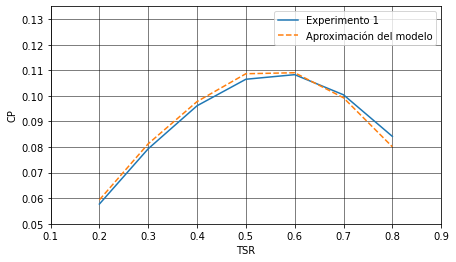

In [283]:
test_predictions = model.predict(X_test[0:7])
scoreP1=r2_score(Y_test[0:7], test_predictions)
pred_df = pd.DataFrame(Y_test[0:7],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[0:7].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'])
line.set_label('Experimento 1')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.1, 0.9])
ax.set_ylim([0.05, 0.135])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

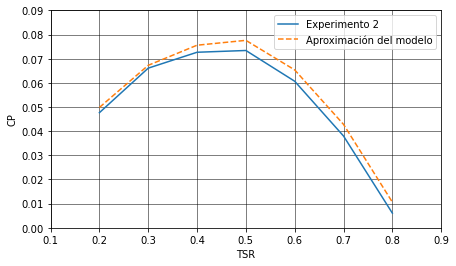

In [286]:
test_predictions = model.predict(X_test[7:14])
scoreP2=r2_score(Y_test[7:14], test_predictions)
pred_df = pd.DataFrame(Y_test[7:14],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[7:14].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'])
line.set_label('Experimento 2')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.1, 0.9])
ax.set_ylim([0.0, 0.09])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()

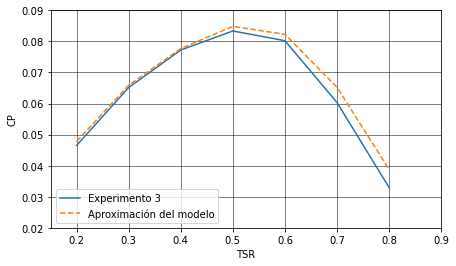

In [288]:
test_predictions = model.predict(X_test[14:21])
scoreP3=r2_score(Y_test[14:21], test_predictions)
pred_df = pd.DataFrame(Y_test[14:21],columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(Y_test[14:21].shape[0],))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("TSR")
plt.ylabel("CP")
line, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Test Y'].values)
line.set_label('Experimento 3')
ax.legend()
line2, = ax.plot([0.2,0.3,0.4,0.5,0.6,0.7,0.8],pred_df['Model Predictions'],linestyle='dashed')
line2.set_label('Aproximación del modelo')
ax.legend()
ax.set_xlim([0.15, 0.9])
ax.set_ylim([0.02, 0.09])
plt.grid(b=True, axis='both',color='k', linestyle='-', linewidth=0.5)
plt.show()